## Import basic libraries and load data into a dataframe

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# df = pd.read_csv('/content/drive/MyDrive/CS421 Project/Phishing_Legitimate_full.csv')

#Alternative 
df = pd.read_csv('/content/drive/MyDrive/Phishing_Legitimate_full.csv')

## Exploratory Data Analysis

In [ ]:
df.shape

(10000, 50)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   id                                  10000 non-null  int64  
 1   NumDots                             10000 non-null  int64  
 2   SubdomainLevel                      10000 non-null  int64  
 3   PathLevel                           10000 non-null  int64  
 4   UrlLength                           10000 non-null  int64  
 5   NumDash                             10000 non-null  int64  
 6   NumDashInHostname                   10000 non-null  int64  
 7   AtSymbol                            10000 non-null  int64  
 8   TildeSymbol                         10000 non-null  int64  
 9   NumUnderscore                       10000 non-null  int64  
 10  NumPercent                          10000 non-null  int64  
 11  NumQueryComponents                  10000 

In [ ]:
df.skew()

id                                     0.000000
NumDots                                3.281372
SubdomainLevel                         4.116596
PathLevel                              1.263553
UrlLength                              1.705009
NumDash                                2.791907
NumDashInHostname                      5.989916
AtSymbol                              57.717701
TildeSymbol                            8.565697
NumUnderscore                          5.536585
NumPercent                            14.302589
NumQueryComponents                     5.120551
NumAmpersand                           6.426119
NumHash                               20.782552
NumNumericChars                        3.463138
NoHttps                               -9.291014
RandomString                          -0.100943
IpAddress                              7.427893
DomainInSubdomains                     6.486939
DomainInPaths                          0.287363
HttpsInHostname                        0

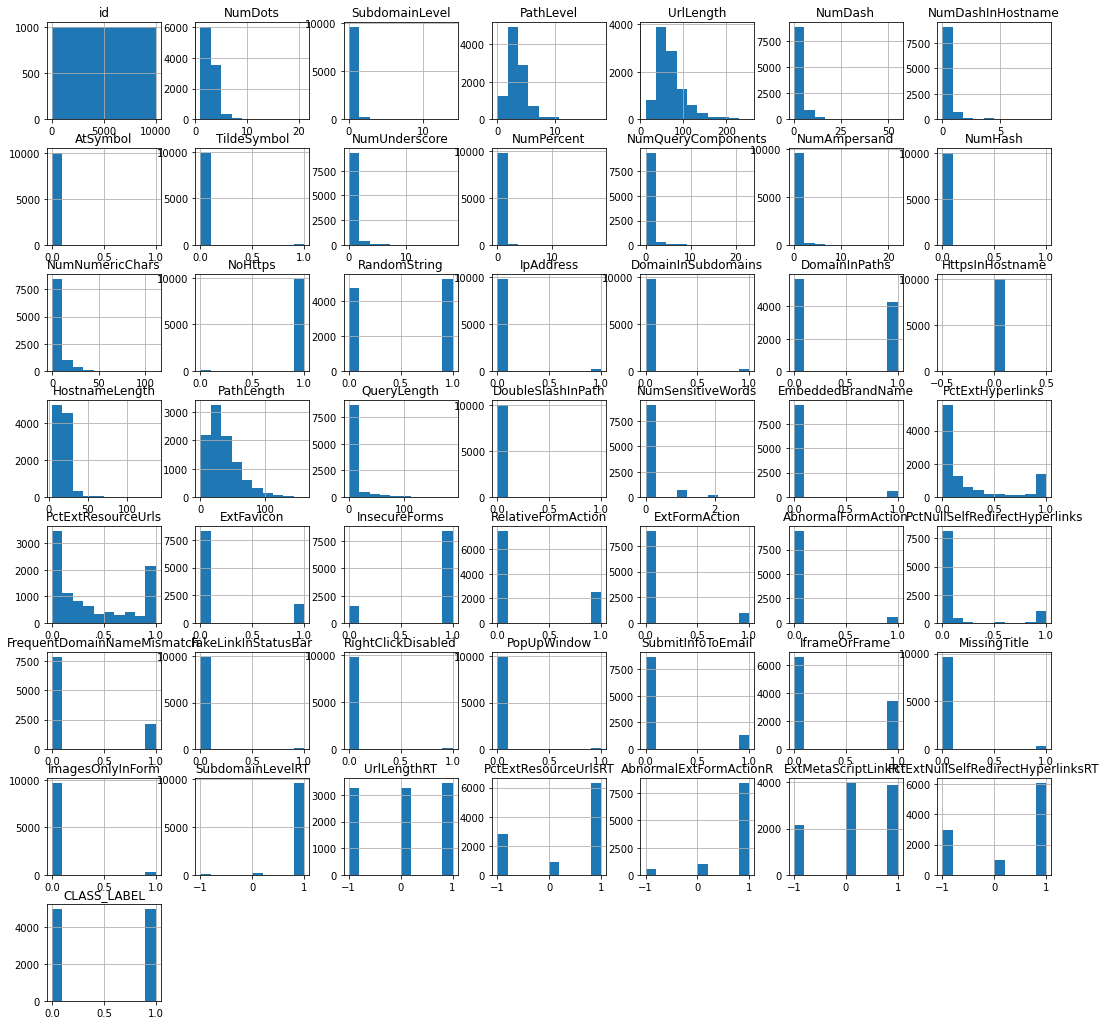

In [ ]:
df.hist(figsize = (18,18))
plt.show()

In [ ]:
df.describe()

,id,NumDots,SubdomainLevel,PathLevel,UrlLength,NumDash,NumDashInHostname,AtSymbol,TildeSymbol,NumUnderscore,NumPercent,NumQueryComponents,NumAmpersand,NumHash,NumNumericChars,NoHttps,RandomString,IpAddress,DomainInSubdomains,DomainInPaths,HttpsInHostname,HostnameLength,PathLength,QueryLength,DoubleSlashInPath,NumSensitiveWords,EmbeddedBrandName,PctExtHyperlinks,PctExtResourceUrls,ExtFavicon,InsecureForms,RelativeFormAction,ExtFormAction,AbnormalFormAction,PctNullSelfRedirectHyperlinks,FrequentDomainNameMismatch,FakeLinkInStatusBar,RightClickDisabled,PopUpWindow,SubmitInfoToEmail,IframeOrFrame,MissingTitle,ImagesOnlyInForm,SubdomainLevelRT,UrlLengthRT,PctExtResourceUrlsRT,AbnormalExtFormActionR,ExtMetaScriptLinkRT,PctExtNullSelfRedirectHyperlinksRT,CLASS_LABEL
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.0,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,2.445100,0.586800,3.300300,70.264100,1.818000,0.138900,0.000300,0.013100,0.32320,0.073800,0.458600,0.277200,0.002300,5.810300,0.988800,0.52520,0.017200,0.022200,0.428900,0.0,18.82430,35.564900,8.606500,0.000900,0.109300,0.057100,0.241334,0.392932,0.167200,0.844000,0.248700,0.1018,0.057600,0.136136,0.215300,0.005500,0.014000,0.004900,0.128800,0.339600,0.03220,0.030400,0.956600,0.020200,0.353300,0.793200,0.173400,0.314100,0.500000
std,2886.89568,1.346836,0.751214,1.863241,33.369877,3.106258,0.545744,0.017319,0.113709,1.11466,0.622248,1.344793,1.117356,0.047906,9.617877,0.105241,0.49939,0.130023,0.147341,0.494944,0.0,8.11654,24.588502,24.313053,0.029988,0.368737,0.232045,0.342370,0.387292,0.373173,0.362873,0.432281,0.3024,0.232997,0.312413,0.411051,0.073961,0.117496,0.069832,0.334995,0.473597,0.17654,0.171694,0.248037,0.820036,0.888908,0.521019,0.755771,0.897843,0.500025
min,1.00000,1.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.0,4.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000
25%,2500.75000,2.000000,0.000000,2.000000,48.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.0,14.00000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.030303,0.000000,1.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000,-1.000000,-1.000000,1.000000,0.000000,-1.000000,0.000000
50%,5000.50000,2.000000,1.000000,3.000000,62.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000,1.00000,0.000000,0.000000,0.000000,0.0,18.00000,30.000000,0.000000,0.000000,0.000000,0.000000,0.071429,0.247511,0.000000,1.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.500000
75%,7500.25000,3.000000,1.000000,4.000000,84.000000,2.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,8.000000,1.000000,1.00000,0.000000,0.000000,1.000000,0.0,22.00000,48.000000,0.000000,0.000000,0.000000,0.000000,0.315874,0.785714,0.000000,1.000000,0.000000,0.0000,0.000000,0.047619,0.000000,0.000000,0.000000,

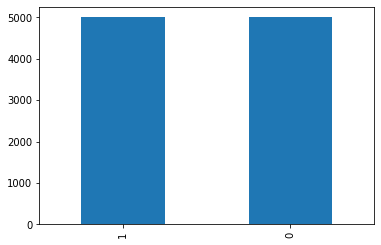

In [ ]:
df['CLASS_LABEL'].value_counts().plot(kind='bar')

In [ ]:
unique=df.nunique().sort_values(ascending=True).reset_index()
unique

,index,0
0,HttpsInHostname,1
1,DoubleSlashInPath,2
2,EmbeddedBrandName,2
3,ExtFavicon,2
4,InsecureForms,2
5,RelativeFormAction,2
6,ExtFormAction,2
7,AbnormalFormAction,2
8,FrequentDomainNameMismatch,2
9,FakeLinkInStatusBar,2


In [ ]:
def create_heatmap(data, lower_col, higher_col):
    y = data['CLASS_LABEL']
    current = data.iloc[:, lower_col:higher_col]
    if not 'id' in current.columns:
      current['CLASS_LABEL'] = y
      sns.heatmap(current.corr(), annot=True, fmt='.2f', cmap='RdYlGn')
      plt.show()

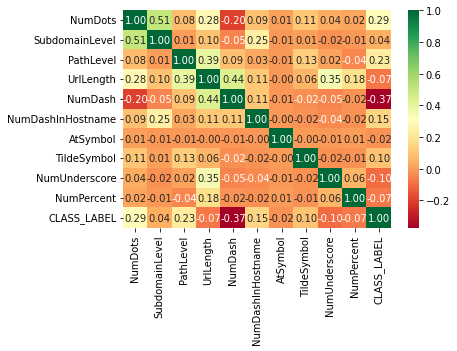

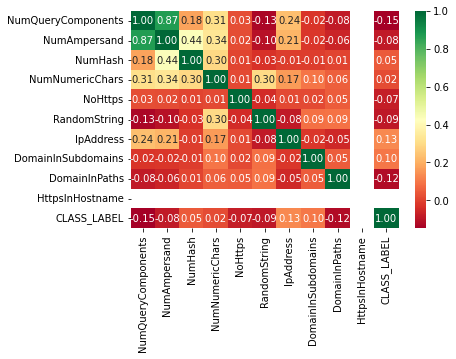

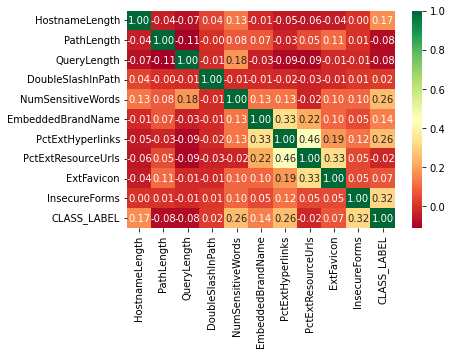

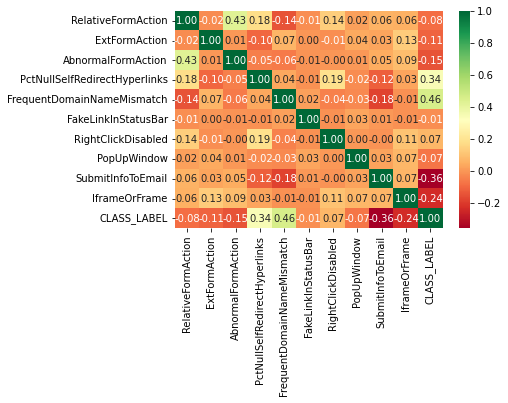

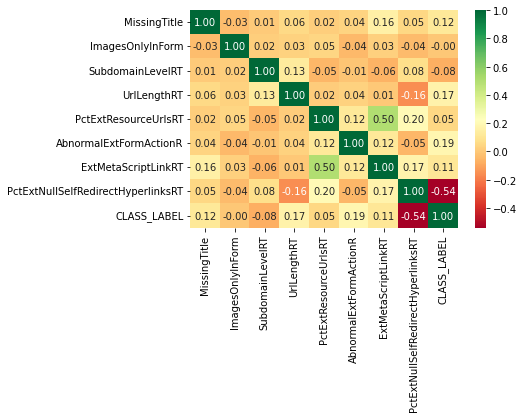

In [ ]:
for i in [1,11,21,31,41]:
  create_heatmap(df, i, i+10)

### Split train and test data

In [ ]:
# Takes first five rows for final prediction - best model
testing1 = df.iloc[:5]
testing2 = df.iloc[-5:]
frames = [testing1, testing2]
testing_data = pd.concat(frames)

In [ ]:
df = df.iloc[5:-5]
df.shape # (9990, 50)

(9990, 50)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = df.drop(["id","CLASS_LABEL"],axis=1)
y = df["CLASS_LABEL"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=421)

### Apply Scaling to the Dataset 

The variables from this set would be used for Logistic Regression, KNN and ANN models

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
X_train_scale = scaler.fit_transform(X_train)
X_test_scale = scaler.fit_transform(X_test)

### PCA

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(0.9, random_state=421)
pca.fit(X_train_scale)

PCA(n_components=0.9, random_state=421)

In [ ]:
pca.n_components_

30

In [ ]:
X_train_pca = pca.transform(X_train_scale)
X_test_pca = pca.transform(X_test_scale)

# Machine Learning Techniques

# Decision Tree Classifier


---

```
References
*   https://scikit-learn.org/stable/modules/tree.html#classification
*   https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve
*   https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score
*   https://scikit-learn.org/stable/modules/generated/sklearn.metrics.log_loss

*   https://www.datacamp.com/community/tutorials/decision-tree-classification-python
*   https://machinelearningmastery.com/precision-recall-and-f-measure-for-imbalanced-classification/
*   https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-classification-in-python/
*   https://machinelearningmastery.com/probability-metrics-for-imbalanced-classification/
*   https://medium.com/@douglaspsteen/beyond-the-f-1-score-a-look-at-the-f-beta-score-3743ac2ef6e3

*   https://stackoverflow.com/questions/32210569/using-gridsearchcv-with-adaboost-and-decisiontreeclassifier
*   https://towardsdatascience.com/fine-tuning-a-classifier-in-scikit-learn-66e048c21e65
*   https://medium.com/@chaudhurysrijani/tuning-of-adaboost-with-computational-complexity-8727d01a9d20
*   https://www.kdnuggets.com/2020/01/decision-tree-algorithm-explained.html
```


**Find these elements from the model**

1.   Accuracy

2.   Precision = $\frac{True Postives}{True Postives+False Positives} $

3.   Recall = $\frac{True Postives}{True Postives+False Negatives} $

4.   F2-score = $\frac{(1+beta^2)*Precision*Recall}{beta^2*Precision+Recall} $

**Evaluate performance of classification model**

5.   ROC & AUC

6.   Cross-Entropy / Log loss = $ L_{log}(y,p) = -(ylog(p)+(1-y)log(1-p)) $

7.   Confusion matrix

In [ ]:
from sklearn import metrics
from sklearn import tree
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier

from sklearn.externals.six import StringIO  
#from six import StringIO
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

import seaborn as sns
import matplotlib.pyplot as plt   
from matplotlib import pyplot

In [ ]:
# feature scaling - unnecessary step for decision tree
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# dt_X_train = scaler.fit_transform(X_train)
# dt_X_test = scaler.fit_transform(X_test)

## Base model without PCA

In [ ]:
# Create & Train Decision Tree classifer
dt_clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)
dt_clf = dt_clf.fit(X_train,y_train)

#Predict the response for test dataset
dt_y_pred = dt_clf.predict(X_test)

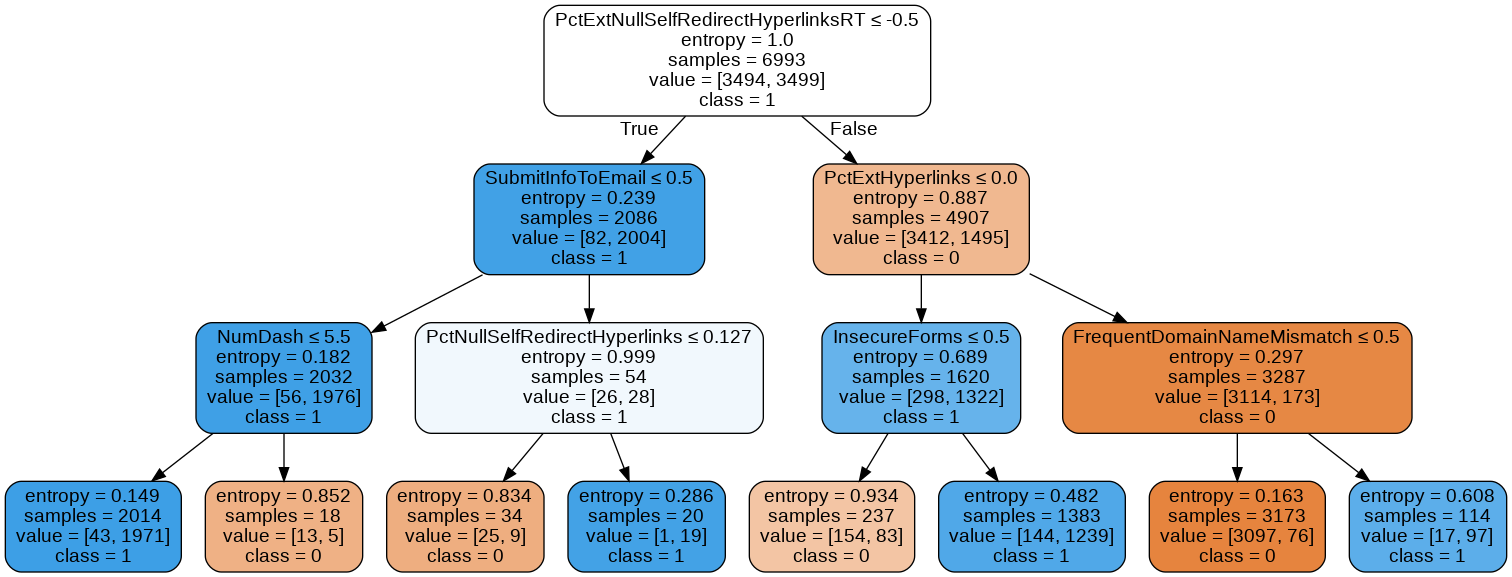

In [ ]:
dot_data = StringIO()
export_graphviz(dt_clf, out_file=dot_data, filled=True, rounded=True, special_characters=True, feature_names = X.columns, class_names=['0','1'])
dt_graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
dt_graph.write_png('DT.png')
Image(dt_graph.create_png())

Accuracy: 0.9359359359359359
Precision: 0.927
Recall: 0.946
F2-Score: 0.942
AUC-Score: 0.936
Log loss score: 2.2127239983775793


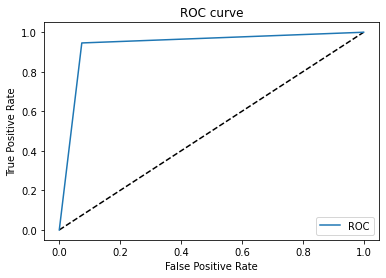

Text(0.5, 1.0, 'Confusion Matrix')

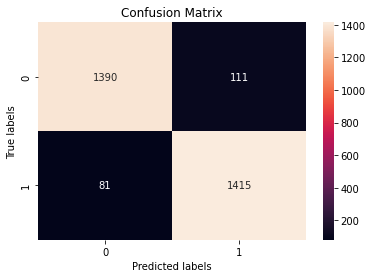

In [ ]:
print('Accuracy:', metrics.accuracy_score(y_test, dt_y_pred))
print('Precision: %.3f' % metrics.precision_score(y_test, dt_y_pred))
print('Recall: %.3f' % metrics.recall_score(y_test, dt_y_pred))
print('F2-Score: %.3f' % metrics.fbeta_score(y_test, dt_y_pred, beta=2))
print('AUC-Score: %.3f' % metrics.roc_auc_score(y_test, dt_y_pred))
print('Log loss score:', metrics.log_loss(y_test,dt_y_pred))

dt_fpr, dt_tpr, thresholds = metrics.roc_curve(y_test, dt_y_pred)
plt.plot([0,1],[0,1],'k--')
plt.plot(dt_fpr, dt_tpr, label='ROC')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend()
plt.show()

dt_cm = metrics.confusion_matrix(y_test, dt_y_pred)  
dt_ax = plt.subplot()
sns.heatmap(dt_cm, annot=True, fmt='g')
dt_ax.set_xlabel('Predicted labels')
dt_ax.set_ylabel('True labels')
dt_ax.set_title('Confusion Matrix')

## Based model with PCA

In [ ]:
dt_clf_pca = DecisionTreeClassifier(criterion="entropy", max_depth=3)
dt_clf_pca = dt_clf_pca.fit(X_train_pca,y_train)
dt_y_pred_pca = dt_clf_pca.predict(X_test_pca)

Accuracy: 0.8391725058391725
Precision: 0.854
Recall: 0.818
F2-Score: 0.825
AUC-Score: 0.839
Log loss score: 5.5548406200233105


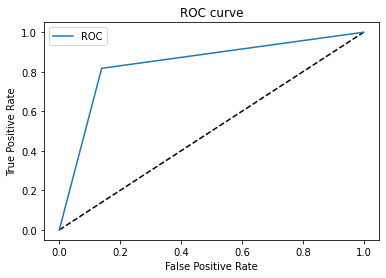

Text(0.5, 1.0, 'Confusion Matrix')

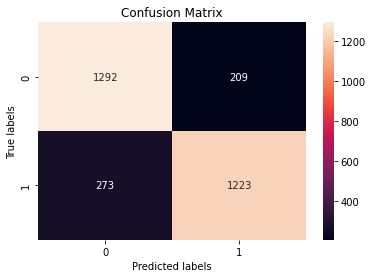

In [ ]:
print('Accuracy:', metrics.accuracy_score(y_test, dt_y_pred_pca))
print('Precision: %.3f' % metrics.precision_score(y_test, dt_y_pred_pca))
print('Recall: %.3f' % metrics.recall_score(y_test, dt_y_pred_pca))
print('F2-Score: %.3f' % metrics.fbeta_score(y_test, dt_y_pred_pca, beta=2))
print('AUC-Score: %.3f' % metrics.roc_auc_score(y_test, dt_y_pred_pca))
print('Log loss score:', metrics.log_loss(y_test,dt_y_pred_pca))

dt_fpr_pca, dt_tpr_pca, thresholds = metrics.roc_curve(y_test, dt_y_pred_pca)
plt.plot([0,1],[0,1],'k--')
plt.plot(dt_fpr_pca, dt_tpr_pca, label='ROC')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend()
plt.show()

dt_cm = metrics.confusion_matrix(y_test, dt_y_pred_pca)  
dt_ax = plt.subplot()
sns.heatmap(dt_cm, annot=True, fmt='g')
dt_ax.set_xlabel('Predicted labels')
dt_ax.set_ylabel('True labels')
dt_ax.set_title('Confusion Matrix')

## Tuned model without PCA
**Tune hyperparameters to optimize recall (F-score where $\beta = 2$)** 

- AdaBoostClassifier
- StratifiedKFold
- GridSearchCV

In [ ]:
dt_abc = AdaBoostClassifier(base_estimator=dt_clf)

parameters = {'base_estimator__max_depth':[i for i in range(2,11,2)],
              'base_estimator__min_samples_leaf':[5,10],
              'n_estimators':[10,50,100],
              'learning_rate':[0.1,1]}

# ftwo_score = metrics.make_scorer(metrics.fbeta_score, beta=2)
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
# dt_clf2 = GridSearchCV(dt_abc, parameters, verbose=3, scoring=ftwo_score, n_jobs=-1, cv=cv)
dt_clf2 = GridSearchCV(dt_abc, parameters, verbose=3, scoring="recall", n_jobs=-1, cv=cv)
dt_clf2 = dt_clf2.fit(X_train, y_train)
dt_y_pred2 = dt_clf2.predict(X_test)

print("\n Best: %f using %s" % (dt_clf2.best_score_, dt_clf2.best_params_))

Fitting 15 folds for each of 60 candidates, totalling 900 fits

 Best: 0.987424 using {'base_estimator__max_depth': 4, 'base_estimator__min_samples_leaf': 5, 'learning_rate': 0.1, 'n_estimators': 100}


Accuracy: 0.982982982982983
Precision: 0.982
Recall: 0.984
F2-Score: 0.984
AUC-Score: 0.983
Log loss score:  0.5877541492395938


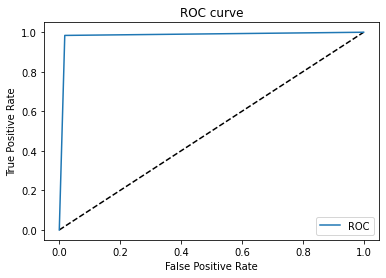

Text(0.5, 1.0, 'Confusion Matrix')

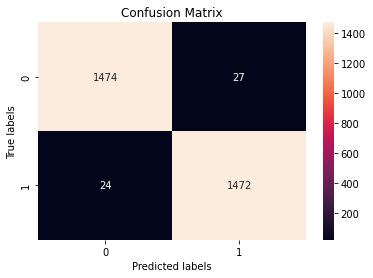

In [ ]:
print('Accuracy:', metrics.accuracy_score(y_test, dt_y_pred2))
print('Precision: %.3f' % metrics.precision_score(y_test, dt_y_pred2))
print('Recall: %.3f' % metrics.recall_score(y_test, dt_y_pred2))
print('F2-Score: %.3f' % metrics.fbeta_score(y_test, dt_y_pred2, beta=2))
print('AUC-Score: %.3f' % metrics.roc_auc_score(y_test, dt_y_pred2))
print("Log loss score: ", metrics.log_loss(y_test,dt_y_pred2))

dt_fpr2, dt_tpr2, thresholds = metrics.roc_curve(y_test, dt_y_pred2)
plt.plot([0,1],[0,1],'k--')
plt.plot(dt_fpr2, dt_tpr2, label='ROC')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend()
plt.show()

dt_cm = metrics.confusion_matrix(y_test, dt_y_pred2)  
dt_ax = plt.subplot()
sns.heatmap(dt_cm, annot=True, fmt='g')
dt_ax.set_xlabel('Predicted labels')
dt_ax.set_ylabel('True labels')
dt_ax.set_title('Confusion Matrix')

## Tuned model with PCA

In [ ]:
dt_abc_pca = AdaBoostClassifier(base_estimator=dt_clf_pca)

parameters = {'base_estimator__max_depth':[i for i in range(2,11,2)],
              'base_estimator__min_samples_leaf':[5,10],
              'n_estimators':[10,50,100],
              'learning_rate':[0.1,1]}

# ftwo_score = metrics.make_scorer(metrics.fbeta_score, beta=2)
cv_pca = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
# dt_clf_pca2 = GridSearchCV(dt_abc_pca, parameters, verbose=3, scoring=ftwo_score, n_jobs=-1, cv=cv_pca)
dt_clf_pca2 = GridSearchCV(dt_abc_pca, parameters, verbose=3, scoring="recall", n_jobs=-1, cv=cv_pca)
dt_clf_pca2 = dt_clf_pca2.fit(X_train, y_train)
dt_y_pred_pca2 = dt_clf_pca2.predict(X_test)

print("\n Best: %f using %s" % (dt_clf_pca2.best_score_, dt_clf_pca2.best_params_))

Fitting 15 folds for each of 60 candidates, totalling 900 fits

 Best: 0.987234 using {'base_estimator__max_depth': 10, 'base_estimator__min_samples_leaf': 5, 'learning_rate': 1, 'n_estimators': 100}


Accuracy: 0.9846513179846513
Precision: 0.981
Recall: 0.988
F2-Score: 0.987
AUC-Score: 0.985
Log loss score:  0.5301321664644443


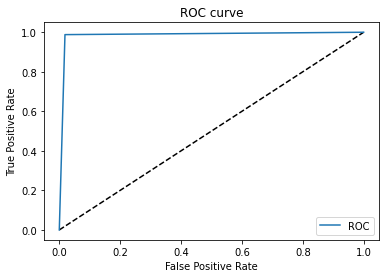

Text(0.5, 1.0, 'Confusion Matrix')

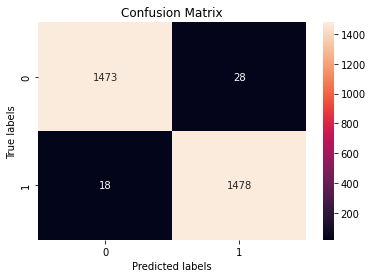

In [ ]:
print('Accuracy:', metrics.accuracy_score(y_test, dt_y_pred_pca2))
print('Precision: %.3f' % metrics.precision_score(y_test, dt_y_pred_pca2))
print('Recall: %.3f' % metrics.recall_score(y_test, dt_y_pred_pca2))
print('F2-Score: %.3f' % metrics.fbeta_score(y_test, dt_y_pred_pca2, beta=2))
print('AUC-Score: %.3f' % metrics.roc_auc_score(y_test, dt_y_pred_pca2))
print("Log loss score: ", metrics.log_loss(y_test,dt_y_pred_pca2))

dt_fpr3, dt_tpr3, thresholds = metrics.roc_curve(y_test, dt_y_pred_pca2)
plt.plot([0,1],[0,1],'k--')
plt.plot(dt_fpr3, dt_tpr3, label='ROC')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend()
plt.show()

dt_cm = metrics.confusion_matrix(y_test, dt_y_pred_pca2)  
dt_ax = plt.subplot()
sns.heatmap(dt_cm, annot=True, fmt='g')
dt_ax.set_xlabel('Predicted labels')
dt_ax.set_ylabel('True labels')
dt_ax.set_title('Confusion Matrix')

# Random Forest

In [ ]:
# References:
# Sklearn
# https://www.programcreek.com/python/example/86075/sklearn.metrics.log_loss
# https://towardsdatascience.com/the-ultimate-guide-to-adaboost-random-forests-and-xgboost-7f9327061c4f

In [ ]:
# Import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

Evaluation for RF Base
Confusion matrix in numbers (base RF without PCA):
[[1469   32]
 [  29 1467]]

Confusion matrix in numbers (base RF with PCA):
[[1424   77]
 [  61 1435]]

Without PCA:
Training accuracy:  1.0
Testing accuracy:  0.9796463129796463
Accuracy:  0.9796463129796463
With PCA:
Training accuracy:  1.0
Testing accuracy:  0.953953953953954
Accuracy:  0.953953953953954

True positives (without PCA):  1467
True positives (with PCA):  1435
True negatives (without PCA):  1469
True negatives (with PCA):  1424
False positives (without PCA):  32
False positives (with PCA):  77
False negatives (with PCA):  29
False negatives (without PCA):  61

Precision (without PCA):  0.9786524349566378
Recall (without PCA):  0.9806149732620321
Precision (with PCA):  0.9490740740740741
Recall (with PCA):  0.9592245989304813

F-score (with focus on recall, beta=2, without PCA): 
0.9802218361619669
F-score (with focus on recall, beta=2, with PCA): 
0.9571771611526148

Random Forest Log Loss (withou

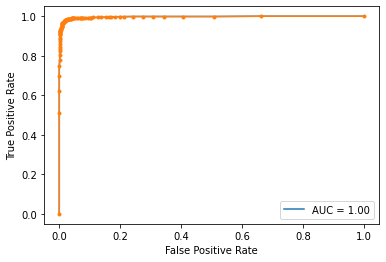

ROC AUC score:  0.9907029449172924
Random Forest Base ROC Curve (with PCA):


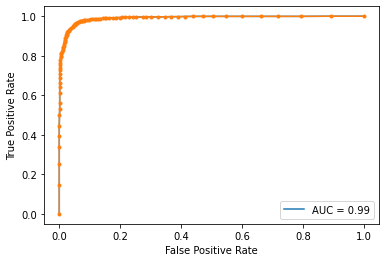

In [ ]:
# Train and evaluate on base classifier
rf_base = RandomForestClassifier()
rf_base.fit(X_train, y_train)

rf_base_pca = RandomForestClassifier()
rf_base_pca.fit(X_train_pca, y_train)

rf_base_y_pred = rf_base.predict(X_test)
rf_base_pca_y_pred = rf_base_pca.predict(X_test_pca)

# Evaluate
# Confusion matrix
rf_base_conf_matrix = metrics.confusion_matrix(y_test, rf_base_y_pred)
rf_base_pca_conf_matrix = metrics.confusion_matrix(y_test, rf_base_pca_y_pred)

print("Evaluation for RF Base")
print("Confusion matrix in numbers (base RF without PCA):")
print(metrics.confusion_matrix(y_test, rf_base_y_pred))
print("")

print("Confusion matrix in numbers (base RF with PCA):")
print(metrics.confusion_matrix(y_test, rf_base_pca_y_pred))
print("")

# Accuracy
print("Without PCA:")
print("Training accuracy: ", rf_base.score(X_train, y_train))
print("Testing accuracy: ", rf_base.score(X_test, y_test))
print("Accuracy: ", metrics.accuracy_score(y_test, rf_base_y_pred))

print("With PCA:")
print("Training accuracy: ", rf_base_pca.score(X_train_pca, y_train))
print("Testing accuracy: ", rf_base_pca.score(X_test_pca, y_test))
print("Accuracy: ", metrics.accuracy_score(y_test, rf_base_pca_y_pred))
print("")

# True Positives, etc.
rfb_tn, rfb_fp, rfb_fn, rfb_tp = rf_base_conf_matrix.ravel()
rfb_pca_tn, rfb_pca_fp, rfb_pca_fn, rfb_pca_tp = rf_base_pca_conf_matrix.ravel()

print("True positives (without PCA): ", rfb_tp)
print("True positives (with PCA): ", rfb_pca_tp)

print("True negatives (without PCA): ", rfb_tn)
print("True negatives (with PCA): ", rfb_pca_tn)

print("False positives (without PCA): ", rfb_fp)
print("False positives (with PCA): ", rfb_pca_fp)

print("False negatives (with PCA): ", rfb_fn)
print("False negatives (without PCA): ", rfb_pca_fn)
print("")

# Calculate precision and recall
rfb_precision = rfb_tp / (rfb_tp + rfb_fp)
rfb_recall = rfb_tp / (rfb_tp + rfb_fn)

rfb_pca_precision = rfb_pca_tp / (rfb_pca_tp + rfb_pca_fp)
rfb_pca_recall = rfb_pca_tp / (rfb_pca_tp + rfb_pca_fn)

print("Precision (without PCA): ", rfb_precision)
print("Recall (without PCA): ", rfb_recall)

print("Precision (with PCA): ", rfb_pca_precision)
print("Recall (with PCA): ", rfb_pca_recall)
print("")

# Fbeta-score with beta=2
rfb_fbeta_score = metrics.fbeta_score(y_test, rf_base_y_pred, beta=2)
rfb_pca_fbeta_score = metrics.fbeta_score(y_test, rf_base_pca_y_pred, beta=2)

print("F-score (with focus on recall, beta=2, without PCA): ")
print(rfb_fbeta_score)

print("F-score (with focus on recall, beta=2, with PCA): ")
print(rfb_pca_fbeta_score)
print("")

# Log loss
rfb_probs = rf_base.predict_proba(X_test)
rfb_log_loss = metrics.log_loss(y_test, rfb_probs)

rfb_pca_probs = rf_base_pca.predict_proba(X_test_pca)
rfb_pca_log_loss = metrics.log_loss(y_test, rfb_pca_probs)

print("Random Forest Log Loss (without PCA): ")
print(rfb_log_loss)

print("Random Forest Log Loss (with PCA): ")
print(rfb_pca_log_loss)
print("")

# ROC / AUC (without PCA)
rfb_roc_auc_score = metrics.roc_auc_score(y_test, rfb_probs[:,1])
rfb_fpr, rfb_tpr, rfb_thresholds = metrics.roc_curve(y_test, rfb_probs[:,1])
rfb_roc_auc = metrics.auc(rfb_fpr, rfb_tpr)
print("ROC AUC score: ", rfb_roc_auc_score)

rfb_roc_disp = metrics.RocCurveDisplay(fpr=rfb_fpr, tpr=rfb_tpr, roc_auc=rfb_roc_auc_score, estimator_name=None)
print("Random Forest Base ROC Curve (without PCA):")
rfb_roc_disp.plot()
plt.plot(rfb_fpr, rfb_tpr, marker='.', label='Random Forest ROC Curve')
plt.show()

# ROC / AUC (with PCA)
rfb_pca_roc_auc_score = metrics.roc_auc_score(y_test, rfb_pca_probs[:,1])
rfb_pca_fpr, rfb_pca_tpr, rfb_pca_thresholds = metrics.roc_curve(y_test, rfb_pca_probs[:,1])
rfb_pca_roc_auc = metrics.auc(rfb_pca_fpr, rfb_pca_tpr)
print("ROC AUC score: ", rfb_pca_roc_auc_score)

rfb_pca_roc_disp = metrics.RocCurveDisplay(fpr=rfb_pca_fpr, tpr=rfb_pca_tpr, roc_auc=rfb_pca_roc_auc_score, estimator_name=None)
print("Random Forest Base ROC Curve (with PCA):")
rfb_pca_roc_disp.plot()
plt.plot(rfb_pca_fpr, rfb_pca_tpr, marker='.', label='Random Forest ROC Curve (PCA)')
plt.show()

## Random Forest GridSearch

In [ ]:
rforest = RandomForestClassifier()

In [ ]:
# Hyperparameters
rf_n_estimators = [int(x) for x in range(50, 150, 10)]  # 50 - 140
rf_max_depth = [2, 3, 4]
rf_random_state = [int(x) for x in range(10, 60, 10)]  # 10 - 50
rf_min_samples_leaf = [int(x) for x in range(10, 30, 5)] # 10 - 25

# Parameter grid
rf_param_grid = {
    'n_estimators': rf_n_estimators,
    'max_depth': rf_max_depth,
    'random_state': rf_random_state,
    'min_samples_leaf': rf_min_samples_leaf
}

print("Param grid:")
print(rf_param_grid)

Param grid:
{'n_estimators': [50, 60, 70, 80, 90, 100, 110, 120, 130, 140], 'max_depth': [2, 3, 4], 'random_state': [10, 20, 30, 40, 50], 'min_samples_leaf': [10, 15, 20, 25]}


In [ ]:
# Grid search
from sklearn.model_selection import GridSearchCV
rforest_grid = GridSearchCV(estimator=rforest, param_grid=rf_param_grid, scoring = 'recall', cv=3, verbose=2, n_jobs=4)
rforest_grid.fit(X_train, y_train)

Fitting 3 folds for each of 600 candidates, totalling 1800 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=4,
             param_grid={'max_depth': [2, 3, 4],
                         'min_samples_leaf': [10, 15, 20, 25],
                         'n_estimators': [50, 60, 70, 80, 90, 100, 110, 120,
                                          130, 140],
                         'random_state': [10, 20, 30, 40, 50]},
             scoring='recall', verbose=2)

In [ ]:
# Get best parameters
rf_best_params = rforest_grid.best_params_
print("Best parameters:")
print(rf_best_params)

print("GridSearch train accuracy:")
print(rforest_grid.score(X_train, y_train))

print("GridSearch test accuracy:")
print(rforest_grid.score(X_test, y_test))

Best parameters:
{'max_depth': 4, 'min_samples_leaf': 15, 'n_estimators': 60, 'random_state': 30}
GridSearch train accuracy:
0.9694198342383538
GridSearch test accuracy:
0.9552139037433155


In [ ]:
# Train classifier with parameters obtained from Grid Search
rforest = RandomForestClassifier(
    n_estimators=rf_best_params["n_estimators"], 
    random_state=rf_best_params["random_state"], 
    max_depth=rf_best_params["max_depth"], 
    min_samples_leaf=rf_best_params["min_samples_leaf"]
) # default criterion is gini

rforest.fit(X_train, y_train)

rf_y_pred = rforest.predict(X_test)
print("Predictions: ", rf_y_pred)

Predictions:  [0 1 0 ... 0 0 0]


Confusion matrix in numbers:
[[1424   77]
 [  67 1429]]

Confusion matrix in percentages:


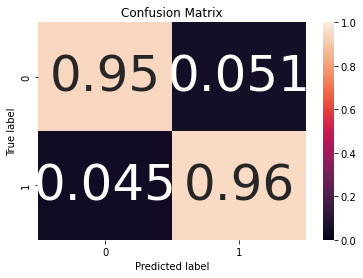

In [ ]:
# Evaluation with confusion matrix

import matplotlib.pyplot as plt
import seaborn as sns

# Plot confusion matrix
def plot_confusion_matrix(conf_matrix, classes=None, title="Confusion Matrix"):
  if classes is not None:
    sns.heatmap(conf_matrix, xticklabels=classes, yticklabels=classes, vmin=0., vmax=1., annot=True, annot_kws={'size':50})
  else:
    sns.heatmap(conf_matrix, vmin=0., vmax=1.)
  plt.title(title)
  plt.ylabel('True label')
  plt.xlabel('Predicted label')

# Confusion matrix
conf_matrix = metrics.confusion_matrix(y_test, rf_y_pred)
conf_matrix_norm = conf_matrix / conf_matrix.sum(axis=1)[:, np.newaxis]

print("Confusion matrix in numbers:")
print(metrics.confusion_matrix(y_test, rf_y_pred))
print("")

print("Confusion matrix in percentages:")
plt.figure()
plot_confusion_matrix(conf_matrix_norm, classes=rforest.classes_)

In [ ]:
# Evaluation

# Accuracy
print("Training accuracy: ", rforest.score(X_train, y_train))
print("Testing accuracy: ", rforest.score(X_test, y_test))
print("Accuracy: ", metrics.accuracy_score(y_test, rf_y_pred))
print("")

# True Positives, etc.
rf_tn, rf_fp, rf_fn, rf_tp = conf_matrix.ravel()
print("True positives: ", rf_tp)
print("True negatives: ", rf_tn)
print("False positives: ", rf_fp)
print("False negatives: ", rf_fn)
print("")

# Calculate precision and recall
precision = rf_tp / (rf_tp + rf_fp)
recall = rf_tp / (rf_tp + rf_fn)
print("Precision: ", precision)
print("Recall: ", recall)
print("")

# Fbeta-score with beta=2
rf_fbeta_score = metrics.fbeta_score(y_test, rf_y_pred, beta=2)
print("F-score (with focus on recall, beta=2): ")
print(rf_fbeta_score)
print("")

# Log loss
rforest_probs = rforest.predict_proba(X_test)
rf_log_loss = metrics.log_loss(y_test, rforest_probs)
print("Random Forest Log Loss: ")
print(rf_log_loss)
print("")

# Show most important features
rf_feature_list = list(X.columns)
rf_feature_importance = pd.Series(rforest.feature_importances_, index=rf_feature_list).sort_values(ascending=False)
print("Top 5 Features by importance:")
print(rf_feature_importance[:5])

Training accuracy:  0.9619619619619619
Testing accuracy:  0.9519519519519519
Accuracy:  0.9519519519519519

True positives:  1429
True negatives:  1424
False positives:  77
False negatives:  67

Precision:  0.9488711819389111
Recall:  0.9552139037433155

F-score (with focus on recall, beta=2): 
0.9539385847797062

Random Forest Log Loss: 
0.2796040032287804

Top 5 Features by importance:
PctExtHyperlinks                      0.192988
PctExtNullSelfRedirectHyperlinksRT    0.148935
FrequentDomainNameMismatch            0.145110
PctNullSelfRedirectHyperlinks         0.081530
PctExtResourceUrls                    0.079247
dtype: float64


ROC AUC score:  0.9893961066953583
Random Forest ROC Curve:


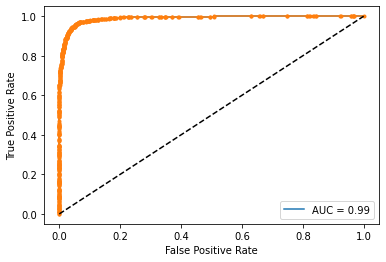

In [ ]:
# ROC / AUC

rf_roc_auc_score = metrics.roc_auc_score(y_test, rforest_probs[:,1])
rf_fpr, rf_tpr, rf_thresholds = metrics.roc_curve(y_test, rforest_probs[:,1])
rf_roc_auc = metrics.auc(rf_fpr, rf_tpr)
print("ROC AUC score: ", rf_roc_auc_score)

rf_roc_disp = metrics.RocCurveDisplay(fpr=rf_fpr, tpr=rf_tpr, roc_auc=rf_roc_auc_score, estimator_name=None)
print("Random Forest ROC Curve:")
rf_roc_disp.plot()
plt.plot(rf_fpr, rf_tpr, marker='.', label='Random Forest ROC Curve')
plt.plot([0,1],[0,1],'k--')
plt.show()

## Random Forest GridSearch with PCA

In [ ]:
# Grid search
rforest_grid_pca = GridSearchCV(estimator=rforest, param_grid=rf_param_grid, scoring = 'recall', cv=3, verbose=2, n_jobs=4)
rforest_grid_pca.fit(X_train_pca, y_train)

Fitting 3 folds for each of 600 candidates, totalling 1800 fits


GridSearchCV(cv=3,
             estimator=RandomForestClassifier(max_depth=4, min_samples_leaf=15,
                                              n_estimators=60,
                                              random_state=30),
             n_jobs=4,
             param_grid={'max_depth': [2, 3, 4],
                         'min_samples_leaf': [10, 15, 20, 25],
                         'n_estimators': [50, 60, 70, 80, 90, 100, 110, 120,
                                          130, 140],
                         'random_state': [10, 20, 30, 40, 50]},
             scoring='recall', verbose=2)

In [ ]:
# Get best parameters
rf_best_params_pca = rforest_grid_pca.best_params_
print("Best parameters:")
print(rf_best_params_pca)

print("GridSearch train accuracy:")
print(rforest_grid_pca.score(X_train_pca, y_train))

print("GridSearch test accuracy:")
print(rforest_grid_pca.score(X_test_pca, y_test))

Best parameters:
{'max_depth': 4, 'min_samples_leaf': 10, 'n_estimators': 140, 'random_state': 20}
GridSearch train accuracy:
0.9205487282080594
GridSearch test accuracy:
0.9157754010695187


In [ ]:
# Train classifier with parameters obtained from Grid Search
rforest_pca = RandomForestClassifier(
    n_estimators=rf_best_params_pca["n_estimators"], 
    random_state=rf_best_params_pca["random_state"], 
    max_depth=rf_best_params_pca["max_depth"],
    min_samples_leaf=rf_best_params_pca["min_samples_leaf"]
) # default criterion is gini

rforest_pca.fit(X_train_pca, y_train)

rf_y_pred_pca = rforest_pca.predict(X_test_pca)
print("Predictions: ", rf_y_pred_pca)

Predictions:  [0 1 0 ... 0 0 0]


Confusion matrix in numbers:
[[1365  136]
 [ 126 1370]]

Confusion matrix in percentages:


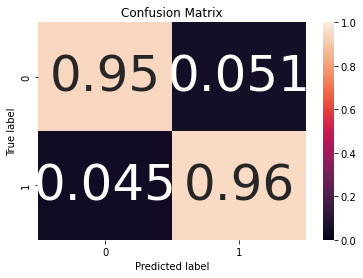

In [ ]:
# Evaluation with confusion matrix
# Plot confusion matrix
def plot_confusion_matrix(conf_matrix, classes=None, title="Confusion Matrix"):
  if classes is not None:
    sns.heatmap(conf_matrix, xticklabels=classes, yticklabels=classes, vmin=0., vmax=1., annot=True, annot_kws={'size':50})
  else:
    sns.heatmap(conf_matrix, vmin=0., vmax=1.)
  plt.title(title)
  plt.ylabel('True label')
  plt.xlabel('Predicted label')

# Confusion matrix
conf_matrix_pca = metrics.confusion_matrix(y_test, rf_y_pred_pca)
conf_matrix_norm_pca = conf_matrix / conf_matrix.sum(axis=1)[:, np.newaxis]

print("Confusion matrix in numbers:")
print(metrics.confusion_matrix(y_test, rf_y_pred_pca))
print("")

print("Confusion matrix in percentages:")
plt.figure()
plot_confusion_matrix(conf_matrix_norm_pca, classes=rforest_pca.classes_)

In [ ]:
# Evaluation

# Accuracy
print("Training accuracy: ", rforest_pca.score(X_train_pca, y_train))
print("Testing accuracy: ", rforest_pca.score(X_test_pca, y_test))
print("Accuracy: ", metrics.accuracy_score(y_test, rf_y_pred_pca))
print("")

# True Positives, etc.
rf_tn_pca, rf_fp_pca, rf_fn_pca, rf_tp_pca = conf_matrix_pca.ravel()
print("True positives: ", rf_tp_pca)
print("True negatives: ", rf_tn_pca)
print("False positives: ", rf_fp_pca)
print("False negatives: ", rf_fn_pca)
print("")

# Calculate precision and recall
precision_pca = rf_tp_pca / (rf_tp_pca + rf_fp_pca)
recall_pca = rf_tp_pca / (rf_tp_pca + rf_fn_pca)
print("Precision: ", precision_pca)
print("Recall: ", recall_pca)
print("")

# Fbeta-score with beta=2
rf_fbeta_score_pca = metrics.fbeta_score(y_test, rf_y_pred_pca, beta=2)
print("F-score (with focus on recall, beta=2): ")
print(rf_fbeta_score_pca)
print("")

# Log loss
rforest_probs_pca = rforest_pca.predict_proba(X_test_pca)
rf_log_loss_pca = metrics.log_loss(y_test, rforest_probs_pca)
print("Random Forest Log Loss: ")
print(rf_log_loss_pca)
print("")

# Show most important features - not sure how since pca 
# rf_feature_list = list(X_train_pca.columns)
# rf_feature_importance_pca = pd.Series(rforest_pca.feature_importances_, index=rf_feature_list).sort_values(ascending=False)
# print("Top 5 Features by importance:")
# print(rf_feature_importance_pca[:5])

Training accuracy:  0.915057915057915
Testing accuracy:  0.9125792459125792
Accuracy:  0.9125792459125792

True positives:  1370
True negatives:  1365
False positives:  136
False negatives:  126

Precision:  0.9096945551128818
Recall:  0.9157754010695187

F-score (with focus on recall, beta=2): 
0.9145527369826435

Random Forest Log Loss: 
0.37081621613235705



ROC AUC score:  0.9672424266175492
Random Forest ROC Curve:


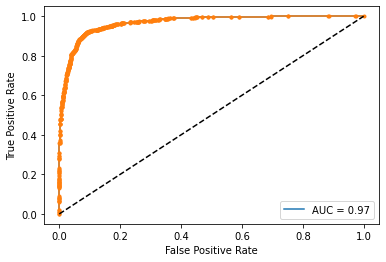

In [ ]:
# ROC / AUC

rf_roc_auc_score_pca = metrics.roc_auc_score(y_test, rforest_probs_pca[:,1])
rf_fpr_pca, rf_tpr_pca, rf_thresholds_pca = metrics.roc_curve(y_test, rforest_probs_pca[:,1])
rf_roc_auc_pca = metrics.auc(rf_fpr_pca, rf_tpr_pca)
print("ROC AUC score: ", rf_roc_auc_score_pca)

rf_roc_disp_pca = metrics.RocCurveDisplay(fpr=rf_fpr_pca, tpr=rf_tpr_pca, roc_auc=rf_roc_auc_score_pca, estimator_name=None)
print("Random Forest ROC Curve:")
rf_roc_disp_pca.plot()
plt.plot(rf_fpr_pca, rf_tpr_pca, marker='.', label='Random Forest ROC Curve')
plt.plot([0,1],[0,1],'k--')
plt.show()

# k-Nearest Neighbour

### y_pred_dict_knn to collect y_pred values

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
#initiate y_pred_dict_knn
y_pred_dict_knn = {}

In [ ]:
#function to save y_pred values into y_pred_test
def save_y_pred(model,isPCA,isGrid):

  key = "base"
  if isGrid:
    key = "grid"
  if isPCA:
    X_test = X_test_pca
    X_train = X_train_pca
    key += "_pca"
  else:
    X_test = X_test_scale
    X_train = X_train_scale

  y_pred = model.predict(X_test)
  y_pred_probs = model.predict_proba(X_test)

  #save to y_pred_dict
  y_pred_dict_knn[key] = [y_pred,y_pred_probs]

### Base model

In [ ]:
knn_base = KNeighborsClassifier()

In [ ]:
knn_base.fit(X_train_scale,y_train)

KNeighborsClassifier()

In [ ]:
save_y_pred(knn_base,False,False)

### Base model with PCA

In [ ]:
knn_base_pca = KNeighborsClassifier()

In [ ]:
knn_base_pca.fit(X_train_pca,y_train)

KNeighborsClassifier()

In [ ]:
save_y_pred(knn_base_pca,True,False)

### GridSearchCV (non-PCA)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedKFold

In [ ]:
param_grid_knn = {
    'knn__n_neighbors': range(1,11, 2),
    'knn__leaf_size': range(20,40,5),
    'knn__p': (1,2),
    'knn__weights': ('uniform', 'distance'),
    'knn__metric': ('minkowski', 'chebyshev')
}
pipeline_knn = Pipeline(steps=[
                     ('preprocess',StandardScaler()),
                     ('knn',KNeighborsClassifier(algorithm='auto'))
])

stratified_kfold_knn = StratifiedKFold(shuffle=True, n_splits=5, random_state=2021)
                   
# with GridSearch
grid_search_knn = GridSearchCV(
    estimator = pipeline_knn,
    param_grid = param_grid_knn,
    scoring = 'recall',
    cv = stratified_kfold_knn,
    n_jobs = -1,
)

In [ ]:
knn_grid=grid_search_knn.fit(X_train_scale, y_train)

In [ ]:
save_y_pred(knn_grid,False,True)

In [ ]:
knn_grid.best_params_

{'knn__leaf_size': 20,
 'knn__metric': 'minkowski',
 'knn__n_neighbors': 7,
 'knn__p': 1,
 'knn__weights': 'distance'}

### GridSearchCV (PCA)

In [ ]:
pipeline_knn_pca = Pipeline(steps=[
                     ('preprocess',StandardScaler()),
                     ('pca_pipe', PCA(n_components=pca.n_components_)),
                     ('knn',KNeighborsClassifier(algorithm='auto'))
])

In [ ]:
grid_search_knn_pca = GridSearchCV(
    estimator = pipeline_knn_pca,
    param_grid = param_grid_knn,
    scoring = 'recall',
    n_jobs = -1,
    cv = stratified_kfold_knn
)

In [ ]:
knn_grid_pca=grid_search_knn_pca.fit(X_train_pca, y_train)

In [ ]:
save_y_pred(knn_grid_pca,True,True)

In [ ]:
knn_grid_pca.best_params_

{'knn__leaf_size': 20,
 'knn__metric': 'minkowski',
 'knn__n_neighbors': 5,
 'knn__p': 2,
 'knn__weights': 'distance'}

### Comparing performance metrics

In [ ]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, fbeta_score, accuracy_score, roc_auc_score, log_loss, roc_curve, auc, RocCurveDisplay

In [ ]:
def get_metrics_df(y_pred_dict):
  metrics = {
    'Accuracy Score' : [],
    'Recall Score' : [],
    'Precision SCore' : [],
    'F2-Score' : [],
    'Log Loss Score' : [],
    'AUC Score' : []
  }

  for key, value in y_pred_dict.items():
    for metrics_key in metrics: 
      if metrics_key == "Accuracy Score":
        metrics[metrics_key].append(accuracy_score(y_test, value[0]))
      elif metrics_key == "Recall Score":
        metrics[metrics_key].append(recall_score(y_test, value[0]))
      elif metrics_key == "Precision Score":
        metrics[metrics_key].append(precision_score(y_test, value[0]))
      elif metrics_key == "F2-Score":
        metrics[metrics_key].append(fbeta_score(y_test, value[0], beta=2))
      elif metrics_key == "Log Loss Score":
        metrics[metrics_key].append(log_loss(y_test, value[1]))
      else:
        metrics[metrics_key].append(roc_auc_score(y_test, value[0]))

  metrics_df = pd.DataFrame(metrics, index=[x for x in y_pred_dict.keys()])
  return metrics_df


In [ ]:
knn_metrics_df = get_metrics_df(y_pred_dict_knn)
knn_metrics_df

,Accuracy Score,Recall Score,Precision SCore,F2-Score,Log Loss Score,AUC Score
base,0.946280,0.951872,0.946289,0.949713,0.578559,0.946289
base_pca,0.944611,0.949866,0.944620,0.947839,0.617279,0.944620
grid,0.959293,0.976604,0.959321,0.969862,0.336641,0.959321
grid_pca,0.946613,0.957219,0.946631,0.953142,0.577887,0.946631


## Best model performance

In [ ]:
knn_grid.best_params_

{'knn__leaf_size': 20,
 'knn__metric': 'minkowski',
 'knn__n_neighbors': 7,
 'knn__p': 1,
 'knn__weights': 'distance'}

Tuned KNN best models with different k values

In [ ]:
accuracy_k = []
recall_k = []
precision_k = []
f2_k = []
log_loss_k = []
auc_k = []
k_values = []

for k in range(1,16,2):
  k_values.append(k)
  knn_model_k = KNeighborsClassifier(n_neighbors=k,weights='distance',algorithm='auto',leaf_size=20,p=1,metric='minkowski')
  pipeline_knn = Pipeline(steps=[
                     ('preprocess',StandardScaler()),
                     ('knn',knn_model_k)
  ])
  pipeline_knn.fit(X_train, y_train)
  y_pred_k = pipeline_knn.predict(X_test)
  y_pred_probs_k = pipeline_knn.predict_proba(X_test)

  accuracy_k.append(accuracy_score(y_test,y_pred_k))
  recall_k.append(recall_score(y_test,y_pred_k))
  precision_k.append(precision_score(y_test,y_pred_k))
  f2_k.append(fbeta_score(y_test,y_pred_k,beta=2))
  log_loss_k.append(log_loss(y_test,y_pred_probs_k))
  auc_k.append(roc_auc_score(y_test,y_pred_k))

Text(0.5, 1.0, 'Accuracy metrics of KNN models for different values of k')

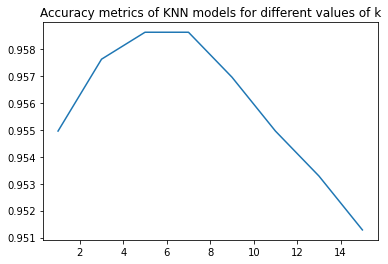

In [ ]:
plt.plot(k_values,accuracy_k)
plt.title('Accuracy metrics of KNN models for different values of k')

Text(0.5, 1.0, 'Recall metrics of KNN models for different values of k')

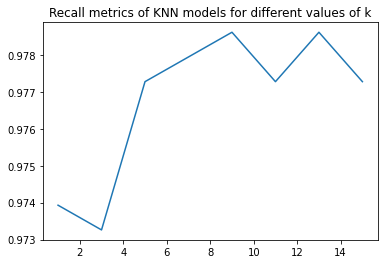

In [ ]:
plt.plot(k_values,recall_k)
plt.title('Recall metrics of KNN models for different values of k')

Text(0.5, 1.0, 'Precision metrics of KNN models for different values of k')

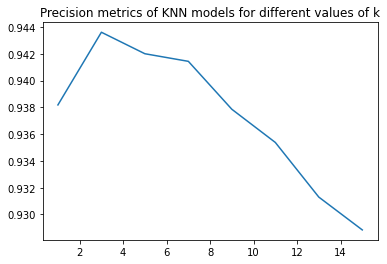

In [ ]:
plt.plot(k_values,precision_k)
plt.title('Precision metrics of KNN models for different values of k')

Text(0.5, 1.0, 'F2 Score metrics of KNN models for different values of k')

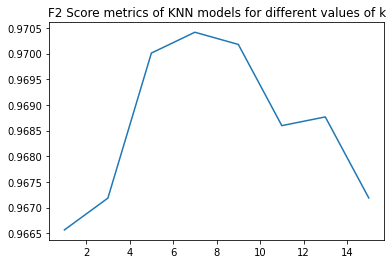

In [ ]:
plt.plot(k_values,f2_k)
plt.title('F2 Score metrics of KNN models for different values of k')

Text(0.5, 1.0, 'Log Loss metrics of KNN models for different values of k')

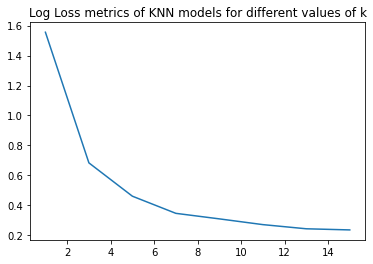

In [ ]:
plt.plot(k_values,log_loss_k)
plt.title('Log Loss metrics of KNN models for different values of k')

Text(0.5, 1.0, 'AUC metrics of KNN models for different values of k')

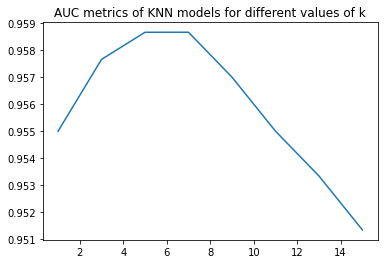

In [ ]:
plt.plot(k_values,auc_k)
plt.title('AUC metrics of KNN models for different values of k')

Confusion matrix in numbers:
[[1414   87]
 [  35 1461]]

Confusion matrix in percentages:


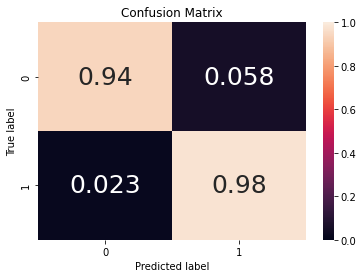

In [ ]:
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(conf_matrix, classes=None, title="Confusion Matrix"):
  if classes is not None:
    sns.heatmap(conf_matrix, xticklabels=classes, yticklabels=classes, vmin=0., vmax=1., annot=True, annot_kws={'size':25})
  else:
    sns.heatmap(conf_matrix, vmin=0., vmax=1.)
  plt.title(title)
  plt.ylabel('True label')
  plt.xlabel('Predicted label')

# Confusion matrix
conf_matrix_knn_grid = confusion_matrix(y_test, y_pred_dict_knn["grid"][0])
conf_matrix_norm_knn_grid = conf_matrix_knn_grid / conf_matrix_knn_grid.sum(axis=1)[:, np.newaxis]

print("Confusion matrix in numbers:")
print(confusion_matrix(y_test, y_pred_dict_knn['grid'][0]))
print("")

print("Confusion matrix in percentages:")
plt.figure()
plot_confusion_matrix(conf_matrix_norm_knn_grid, classes=knn_grid_pca.classes_)

ROC AUC score:  0.9593214594904644
Random Forest ROC Curve:


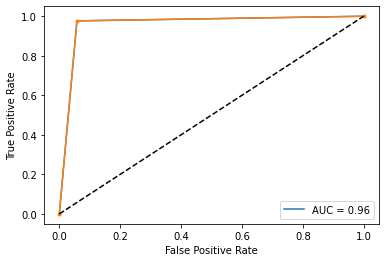

In [ ]:
# ROC / AUC

knn_roc_auc_score_grid = roc_auc_score(y_test,  y_pred_dict_knn["grid"][0])
knn_fpr_grid, knn_tpr_grid, knn_thresholds_grid = roc_curve(y_test,  y_pred_dict_knn["grid"][0])
knn_roc_auc_grid = auc(knn_fpr_grid, knn_tpr_grid)
print("ROC AUC score: ", knn_roc_auc_score_grid)

knn_roc_disp_grid = RocCurveDisplay(fpr=knn_fpr_grid, tpr=knn_tpr_grid, roc_auc=knn_roc_auc_score_grid, estimator_name=None)
print("Random Forest ROC Curve:")
knn_roc_disp_grid.plot()
plt.plot(knn_fpr_grid, knn_tpr_grid, marker='.', label='Random Forest ROC Curve')
plt.plot([0,1],[0,1],'k--')
plt.show()

# ANN Model


##Creating the base ANN model (Sequential)

In [ ]:
%tensorflow_version 1.x
from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow as tf
from tensorflow.keras import layers

print(tf.__version__)
print(tf.keras.__version__)


TensorFlow 1.x selected.
1.15.2
2.2.4-tf


In [ ]:
#sequential model to initialize ANN & build the layers

from keras.models import Sequential
from keras.layers import Dense, Dropout

#We create a NN with 1 input layer, 2 hidden layers with 10 nodes each, 1 output layer with 1 output 
ANN_base_model = tf.keras.Sequential()
ANN_base_model.add(layers.Dense(10, activation=tf.nn.relu, input_dim = 48)) #1 input layer
ANN_base_model.add(layers.Dense(10, activation=tf.nn.relu)) #1 hidden layer
ANN_base_model.add(layers.Dense(10, activation=tf.nn.sigmoid)) #1 hidden layer
ANN_base_model.add(layers.Dense(1, activation=tf.nn.sigmoid))  #1 output layer with 1 output

ANN_base_model.compile(optimizer=tf.train.AdamOptimizer(), 
              loss='binary_crossentropy',
              metrics=[tf.keras.metrics.Recall()])

# Run the stochastic gradient descent for specified epochs & training the ANN
epochs = 10
ANN_base_model.fit(X_train_scale, y_train, epochs=epochs)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


Using TensorFlow backend.


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 6993 samples
Epoch 1/10
6993/6993 [==============================] - 2s 325us/sample - loss: 0.5885 - recall: 0.9340
Epoch 2/10
6993/6993 [==============================] - 1s 111us/sample - loss: 0.2680 - recall: 0.9323
Epoch 3/10
6993/6993 [==============================] - 1s 109us/sample - loss: 0.1836 - recall: 0.9468
Epoch 4/10
6993/6993 [==============================] - 1s 111us/sample - loss: 0.1549 - recall: 0.9506
Epoch 5/10
6993/6993 [==============================] - 1s 106us/sample - loss: 0.1381 - recall: 0.9546
Epoch 6/10
6993/6993 [==============================] - 1s 110us/sample - loss: 0.1265 - recall: 0.9574
Epoch 7/10
6993/6993 [==============================] - 1s 109us/sample - loss: 0.1168 - recall: 0.9643
Epoch 8/10
6993/6993 [==============================] - 1s 111us/sample - loss: 0.1084 - recall: 0.9691
Epoch 9/10
6993/6993 [==============================

##Evaluating the base ANN model

Predicting the response for the test dataset

In [ ]:
y_pred = ANN_base_model.predict(X_test_scale)
y_pred = (y_pred > 0.5)
y_pred_proba = ANN_base_model.predict_proba(X_test_scale)

 ### Evaluating the base model

1. Accuracy
2. Precision
3. Recall
4. F2-Score
5. AUC Score
6. Log Loss

In [ ]:
#Importing the relevant metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import fbeta_score
from sklearn.metrics import roc_auc_score 
from sklearn.metrics import log_loss

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [ ]:

print('Accuracy: ', accuracy_score(y_true=y_test,y_pred=y_pred))
print("Precision: ", precision_score(y_true=y_test,y_pred=y_pred))
print('Recall: ' , recall_score(y_true=y_test, y_pred=y_pred))
print('F2-Score: ' , fbeta_score(y_true=y_test, y_pred=y_pred, beta=2))
print('AUC-Score: ' , roc_auc_score(y_true=y_test, y_score=y_pred_proba))
print('Log loss score:', log_loss(y_true=y_test,y_pred=y_pred))


Accuracy:  0.9562896229562896
Precision:  0.9504950495049505
Recall:  0.9625668449197861
F2-Score:  0.9601280170689424
AUC-Score:  0.9888338701115478
Log loss score: 1.5097229487956512


###Confusion Matrix of Base Model

Text(0.5, 12.5, 'Predicted label')

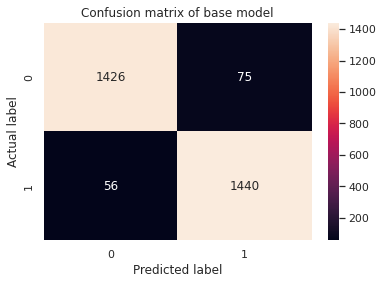

In [ ]:

sns.set()

cm = confusion_matrix(y_test, y_pred)

p = sns.heatmap(pd.DataFrame(cm), annot=True,fmt='g')
plt.title('Confusion matrix of base model', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

###ROC Curve of Base Model


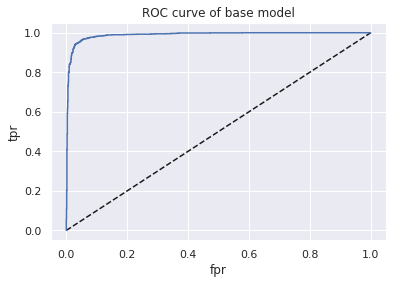

In [ ]:


fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='ANN')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC curve of base model')
plt.show()


##Creating the base ANN model with PCA

In [ ]:
#We create a ANN (PCA) with 1 input layer, 2 hidden layers with 10 nodes each, activation function sigmoid & 1 output layer with 1 output 
PCA_ANN_model = tf.keras.Sequential()
PCA_ANN_model.add(layers.Dense(10, activation=tf.nn.relu, input_dim = 30)) #1 input layer
PCA_ANN_model.add(layers.Dense(10, activation=tf.nn.relu)) #1 hidden layer
PCA_ANN_model.add(layers.Dense(10, activation=tf.nn.sigmoid)) #1 hidden layer
PCA_ANN_model.add(layers.Dense(1, activation=tf.nn.sigmoid))  #1 output layer with 1 output

PCA_ANN_model.compile(optimizer=tf.train.AdamOptimizer(), 
              loss='binary_crossentropy',
              metrics=[tf.keras.metrics.Recall()])

epochs = 10
PCA_ANN_model.fit(X_train_pca, y_train, epochs=epochs)

Train on 6993 samples
Epoch 1/10
6993/6993 [==============================] - 1s 126us/sample - loss: 0.6591 - recall_1: 0.3047
Epoch 2/10
6993/6993 [==============================] - 1s 116us/sample - loss: 0.3270 - recall_1: 0.9214
Epoch 3/10
6993/6993 [==============================] - 1s 110us/sample - loss: 0.2173 - recall_1: 0.9451
Epoch 4/10
6993/6993 [==============================] - 1s 115us/sample - loss: 0.1851 - recall_1: 0.9477
Epoch 5/10
6993/6993 [==============================] - 1s 111us/sample - loss: 0.1689 - recall_1: 0.9508
Epoch 6/10
6993/6993 [==============================] - 1s 110us/sample - loss: 0.1583 - recall_1: 0.9526
Epoch 7/10
6993/6993 [==============================] - 1s 114us/sample - loss: 0.1491 - recall_1: 0.9566
Epoch 8/10
6993/6993 [==============================] - 1s 115us/sample - loss: 0.1429 - recall_1: 0.9586
Epoch 9/10
6993/6993 [==============================] - 1s 114us/sample - loss: 0.1368 - recall_1: 0.9583
Epoch 10/10
6993/6993 [=

###Evaluating the base model with PCA

In [ ]:
pca_y_pred = PCA_ANN_model.predict(X_test_pca)
pca_y_pred = (pca_y_pred > 0.5)
pca_y_pred_proba = PCA_ANN_model.predict_proba(X_test_pca)

print('Accuracy: ', accuracy_score(y_true=y_test,y_pred=pca_y_pred))
print("Precision: ", precision_score(y_true=y_test,y_pred=pca_y_pred))
print('Recall: ' , recall_score(y_true=y_test, y_pred=pca_y_pred))
print('F2-Score: ' , fbeta_score(y_true=y_test, y_pred=y_pred, beta=2))
print('AUC-Score: ' , roc_auc_score(y_true=y_test, y_score=pca_y_pred_proba))
print('Log loss score:', log_loss(y_true=y_test,y_pred=pca_y_pred))

Accuracy:  0.9432766099432766
Precision:  0.931640625
Recall:  0.9565508021390374
F2-Score:  0.9601280170689424
AUC-Score:  0.9845971669510879
Log loss score: 1.9591844994544507


###Confusion Matrix of Base Model with PCA

Text(0.5, 12.5, 'Predicted label')

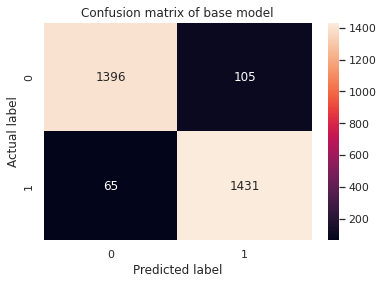

In [ ]:
sns.set()

cm = confusion_matrix(y_test, pca_y_pred)

p = sns.heatmap(pd.DataFrame(cm), annot=True,fmt='g')
plt.title('Confusion matrix of base model', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

###ROC Curve of Base Model with PCA

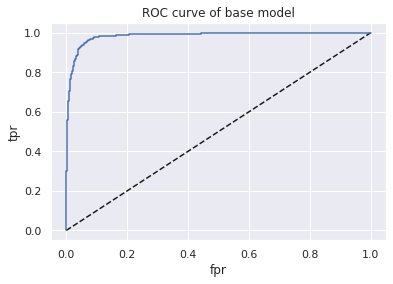

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, pca_y_pred_proba)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='ANN')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC curve of base model')
plt.show()

## Optimizing Base Model with Grid Search

In [ ]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from keras.optimizers import adam


def build_classifier(learn_rate, batch_size):
    ANN_opt_model = Sequential()
    ANN_opt_model.add(Dense(10, input_dim= 48, activation= 'relu'))
    ANN_opt_model.add(Dense(10, activation= 'relu'))
    ANN_opt_model.add(Dense(10, activation= 'sigmoid'))
    ANN_opt_model.add(Dense(1, activation='sigmoid'))

    opt = adam(learning_rate=learn_rate)
    
    ANN_opt_model.compile(loss='binary_crossentropy', optimizer= opt, metrics=[tf.keras.metrics.Recall()])
    return ANN_opt_model

# Defining grid parameters
learn_rate = [0.01, 0.1, 0.2, 0.3]
batch_size = [10, 20, 40, 60]
param_grid = dict(learn_rate=learn_rate, batch_size=batch_size)

classifier = KerasClassifier(build_fn=build_classifier, epochs=10)
ANN_optimized_model = GridSearchCV(estimator=classifier, param_grid=param_grid, scoring='recall')

ANN_optimized_model.fit(X_train_scale, y_train)





Epoch 1/10
5594/5594 [==============================] - 3s 505us/step - loss: 0.2282 - recall_2: 0.9200
Epoch 2/10
5594/5594 [==============================] - 2s 445us/step - loss: 0.1419 - recall_2: 0.9353
Epoch 3/10
5594/5594 [==============================] - 3s 451us/step - loss: 0.1236 - recall_2: 0.9454
Epoch 4/10
5594/5594 [==============================] - 3s 459us/step - loss: 0.1062 - recall_2: 0.9505
Epoch 5/10
5594/5594 [==============================] - 3s 460us/step - loss: 0.0994 - recall_2: 0.9557
Epoch 6/10
5594/5594 [==============================] - 2s 442us/step - loss: 0.0944 - recall_2: 0.9592
Epoch 7/10
5594/5594 [==============================] - 2s 446us/step - loss: 0.0931 - recall_2: 0.9612
Epoch 8/10
5594/5594 [==============================] - 3s 451us/step - loss: 0.0814 - recall_2: 0.9626
Epoch 9/10
5594/5594 [==============================] - 3s 466us/step - loss: 0.0777 - recall_2: 0.9639
Epoch 10/10
5594/5594 [==============================] - 2s 442

GridSearchCV(estimator=<keras.wrappers.scikit_learn.KerasClassifier object at 0x7fc80c1d3410>,
             param_grid={'batch_size': [10, 20, 40, 60],
                         'learn_rate': [0.01, 0.1, 0.2, 0.3]},
             scoring='recall')

In [ ]:

print("Max Recall Registered: {} using {}".format(ANN_optimized_model.best_score_, 
                                                   ANN_optimized_model.best_params_))

Max Recall Registered: 0.9688916465565759 using {'batch_size': 40, 'learn_rate': 0.01}


Predicting the response for the test dataset

In [ ]:
opt_y_pred = ANN_optimized_model.predict(X_test_scale)
opt_y_pred = (opt_y_pred > 0.5)

opt_y_pred_proba = ANN_optimized_model.predict_proba(X_test_scale)


print(opt_y_pred.shape)
print(opt_y_pred_proba.shape)

(2997, 1)
(2997, 2)


###Evaluating the optimized model

In [ ]:
print('Accuracy: ', accuracy_score(y_true=y_test,y_pred=opt_y_pred))
print("Precision: ", precision_score(y_true=y_test,y_pred=opt_y_pred))
print('Recall: ' , recall_score(y_true=y_test, y_pred=opt_y_pred))
print('F2-Score: ' , fbeta_score(y_true=y_test, y_pred=opt_y_pred, beta=2))
print('AUC-Score: ' , roc_auc_score(y_true=y_test, y_score=opt_y_pred_proba[:,1]))
print('Log loss score:', log_loss(y_true=y_test,y_pred=opt_y_pred))

Accuracy:  0.95995995995996
Precision:  0.9605087014725568
Recall:  0.9592245989304813
F2-Score:  0.959481144691094
AUC-Score:  0.9887131840804882
Log loss score: 1.3829497309434988


###Confusion Matrix of optimized model

Text(0.5, 12.5, 'Predicted label')

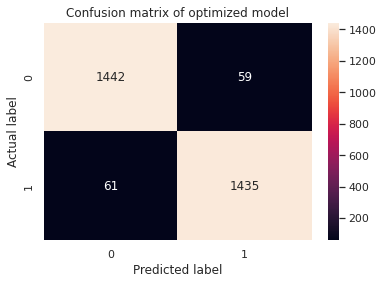

In [ ]:
sns.set()

cm = confusion_matrix(y_test, opt_y_pred)

p = sns.heatmap(pd.DataFrame(cm), annot=True,fmt='g')
plt.title('Confusion matrix of optimized model', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

###ROC Curve of optimized model

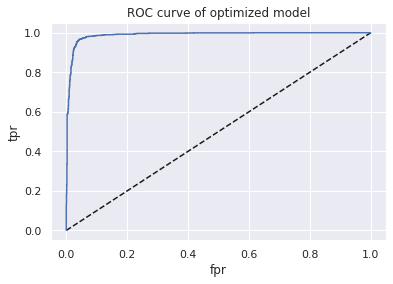

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, opt_y_pred_proba[:,1])
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='ANN')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC curve of optimized model')
plt.show()

##Optimized Model with PCA

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from keras.optimizers import adam

def build_classifier(learn_rate, batch_size):
    pca_opt_ann = Sequential()
    pca_opt_ann.add(Dense(10, input_dim= 30, activation= 'relu'))
    pca_opt_ann.add(Dense(10, activation= 'relu'))
    pca_opt_ann.add(Dense(10, activation= 'sigmoid'))
    pca_opt_ann.add(Dense(1, activation='sigmoid'))

    opt = adam(learning_rate=learn_rate)

    pca_opt_ann.compile(loss='binary_crossentropy', optimizer= opt, metrics=[tf.keras.metrics.Recall()])
    return pca_opt_ann

# Defining grid parameters
learn_rate = [0.01, 0.1, 0.2, 0.3]
batch_size = [10, 20, 40, 60]
param_grid = dict(learn_rate=learn_rate, batch_size=batch_size)

classifier = KerasClassifier(build_fn=build_classifier, epochs=10)
pca_optimized_model = GridSearchCV(estimator= classifier, param_grid=param_grid, scoring = 'recall')
pca_optimized_model.fit(X_train_pca, y_train)



print("Max Recall Registered: {} using {}".format(pca_optimized_model.best_score_, 
                                                   pca_optimized_model.best_params_))




Epoch 1/10
5594/5594 [==============================] - 5s 973us/step - loss: 0.2433 - recall_83: 0.8012
Epoch 2/10
5594/5594 [==============================] - 4s 741us/step - loss: 0.1599 - recall_83: 0.9164
Epoch 3/10
5594/5594 [==============================] - 4s 769us/step - loss: 0.1416 - recall_83: 0.9314
Epoch 4/10
5594/5594 [==============================] - 4s 761us/step - loss: 0.1342 - recall_83: 0.9381
Epoch 5/10
5594/5594 [==============================] - 4s 757us/step - loss: 0.1232 - recall_83: 0.9429
Epoch 6/10
5594/5594 [==============================] - 4s 765us/step - loss: 0.1179 - recall_83: 0.9458
Epoch 7/10
5594/5594 [==============================] - 4s 766us/step - loss: 0.1143 - recall_83: 0.9482
Epoch 8/10
5594/5594 [==============================] - 4s 765us/step - loss: 0.1095 - recall_83: 0.9502
Epoch 9/10
5594/5594 [==============================] - 4s 755us/step - loss: 0.1091 - recall_83: 0.9519
Epoch 10/10
5594/5594 [==============================] 

In [ ]:
opt_y_pred = pca_optimized_model.predict(X_test_pca)
opt_y_pred = (opt_y_pred > 0.5)

opt_y_pred_proba = pca_optimized_model.predict_proba(X_test_pca)


print(opt_y_pred.shape)
print(opt_y_pred_proba.shape)

(2997, 1)
(2997, 2)


In [ ]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, fbeta_score, accuracy_score, roc_auc_score, log_loss, roc_curve, auc, RocCurveDisplay

print('Accuracy: ', accuracy_score(y_true=y_test,y_pred=opt_y_pred))
print("Precision: ", precision_score(y_true=y_test,y_pred=opt_y_pred))
print('Recall: ' , recall_score(y_true=y_test, y_pred=opt_y_pred))
print('F2-Score: ' , fbeta_score(y_true=y_test, y_pred=opt_y_pred, beta=2))
print('AUC-Score: ' , roc_auc_score(y_true=y_test, y_score=opt_y_pred_proba[:,1]))
print('Log loss score:', log_loss(y_true=y_test,y_pred=opt_y_pred))

Accuracy:  0.9542876209542877
Precision:  0.9502982107355865
Recall:  0.9585561497326203
F2-Score:  0.9568931002268785
AUC-Score:  0.9889745962584657
Log loss score: 1.578869648284962


Text(0.5, 12.5, 'Predicted label')

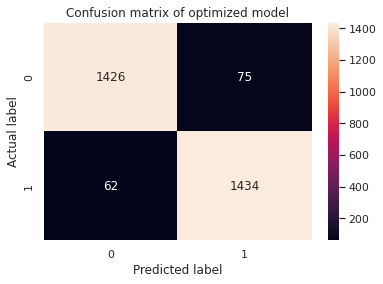

In [ ]:
sns.set()

cm = confusion_matrix(y_test, opt_y_pred)

p = sns.heatmap(pd.DataFrame(cm), annot=True,fmt='g')
plt.title('Confusion matrix of optimized model', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

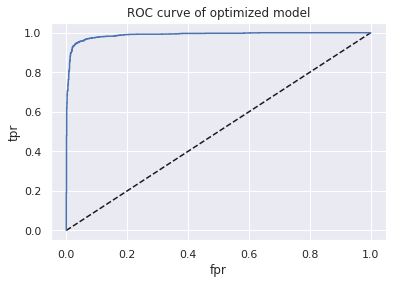

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, opt_y_pred_proba[:,1])
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='ANN')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC curve of optimized model')
plt.show()

# Logistic Regression Model

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np

data = pd.read_csv('/content/drive/MyDrive/Phishing_Legitimate_full.csv')

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, fbeta_score

logisticRegr = LogisticRegression(max_iter = 10000)
logisticRegr_pca = LogisticRegression(max_iter = 10000)
logisticRegr_pca.fit(X_train_pca, y_train)
logisticRegr.fit(X_train_scale, y_train)
y_pred = logisticRegr.predict(X_test_scale)
y_pred_pca = logisticRegr_pca.predict(X_test_pca)

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
logisticRegr_probability = logisticRegr.predict_proba(X_test_scale)
logisticRegr_probability_pca = logisticRegr_pca.predict_proba(X_test_pca)
# generate a no skill prediction (majority class)
lr_ns_probability = [0 for _ in range(len(y_test))]

# predict probabilities
logisticRegr_probability = logisticRegr.predict_proba(X_test_scale)
logisticRegr_probability_pca = logisticRegr_pca.predict_proba(X_test_pca)
# keep probabilities for the positive outcome only
logisticRegr_probability = logisticRegr_probability[:, 1]
logisticRegr_probability_pca = logisticRegr_probability_pca[:, 1]
# calculate scores
lr_ns_auc = roc_auc_score(y_test, lr_ns_probability)
logisticRegr_auc = roc_auc_score(y_test, logisticRegr_probability)
logisticRegr_pca_auc = roc_auc_score(y_test, logisticRegr_probability_pca)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (lr_ns_auc))
print('Logistic without PCA: ROC AUC=%.3f' % (logisticRegr_auc))
print('Logistic with PCA: ROC AUC=%.3f' % (logisticRegr_pca_auc))
# calculate roc curves
lr_ns_fpr, lr_ns_tpr, _ = roc_curve(y_test, lr_ns_probability)
logisticRegr_fpr, logisticRegr_tpr, _ = roc_curve(y_test, logisticRegr_probability)
logisticRegr_fpr_pca, logisticRegr_tpr_pca, _ = roc_curve(y_test, logisticRegr_probability_pca)

No Skill: ROC AUC=0.500
Logistic without PCA: ROC AUC=0.981
Logistic with PCA: ROC AUC=0.975


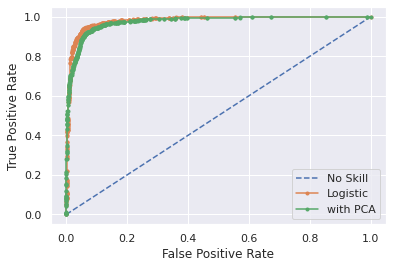

In [ ]:
from matplotlib import pyplot
# calculate roc curves
lr_ns_fpr, lr_ns_tpr, _ = roc_curve(y_test, lr_ns_probability)
lr_fpr, lr_tpr, _ = roc_curve(y_test, logisticRegr_probability)
lr_fpr_pca, lr_tpr_pca, _ = roc_curve(y_test, logisticRegr_probability_pca)
# plot the roc curve for the model
pyplot.plot(lr_ns_fpr, lr_ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
pyplot.plot(lr_fpr_pca, lr_tpr_pca, marker='.', label='with PCA')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [ ]:
# to get the log loss
from sklearn.metrics import log_loss
lr_log_loss = log_loss(y_test, logisticRegr_probability)
lr_log_loss_pca = log_loss(y_test, logisticRegr_probability_pca)
print('log loss without PCA=%.3f' % (lr_log_loss))
print('log loss with PCA=%.3f' % (lr_log_loss_pca))

log loss without PCA=0.176
log loss with PCA=0.214


##Confusion matrix without PCA before tuning:

Without PCA:
Confusion matrix in numbers:
[[1392  109]
 [  75 1421]]

Confusion matrix in percentages:
Accuracy:  0.9386052719386053
Precision:  0.9287581699346406
Recall:  0.9498663101604278
F-score (with focus on recall, beta=2):  0.945568272557892


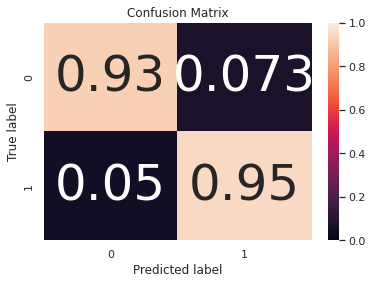

In [ ]:
# Evaluation with confusion matrix

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

# Plot confusion matrix
def plot_confusion_matrix(conf_matrix, classes=None, title="Confusion Matrix"):
  if classes is not None:
    sns.heatmap(conf_matrix, xticklabels=classes, yticklabels=classes, vmin=0., vmax=1., annot=True, annot_kws={'size':50})
  else:
    sns.heatmap(conf_matrix, vmin=0., vmax=1.)
  plt.title(title)
  plt.ylabel('True label')
  plt.xlabel('Predicted label')

print("Without PCA:")

# Confusion matrix
y_pred_bestparams = logisticRegr.predict(X_test_scale)

conf_matrix = metrics.confusion_matrix(y_test, y_pred_bestparams)
conf_matrix_norm = conf_matrix / conf_matrix.sum(axis=1)[:, np.newaxis]

print("Confusion matrix in numbers:")
print(metrics.confusion_matrix(y_test, y_pred_bestparams))
print("")

print("Confusion matrix in percentages:")
plt.figure()
plot_confusion_matrix(conf_matrix_norm, classes=logisticRegr.classes_)

tn, fp, fn, tp = conf_matrix.ravel()

accuracy = (tp + tn) / (tn+ fp+ fn+ tp )
precision = tp / (tp + fp)
recall = tp / (tp + fn)
print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("Recall: ", recall)

# Fbeta-score
f_score = metrics.fbeta_score(y_test, y_pred_bestparams, beta=2)
print("F-score (with focus on recall, beta=2): ", f_score)

##Confusion matrix with PCA after tuning:

With PCA:
Confusion matrix in numbers:
[[1373  128]
 [  98 1398]]

Confusion matrix in percentages:
Accuracy:  0.9245912579245913
Precision:  0.9161205766710354
Recall:  0.9344919786096256
F-score (with focus on recall, beta=2):  0.9307589880159787


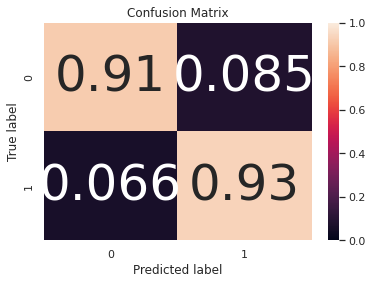

In [ ]:
print("With PCA:")

# Confusion matrix
y_pred_bestparams_pca = logisticRegr_pca.predict(X_test_pca)

conf_matrix_pca = metrics.confusion_matrix(y_test, y_pred_bestparams_pca)
conf_matrix_norm_pca = conf_matrix_pca / conf_matrix_pca.sum(axis=1)[:, np.newaxis]

print("Confusion matrix in numbers:")
print(metrics.confusion_matrix(y_test, y_pred_bestparams_pca))
print("")

print("Confusion matrix in percentages:")
plt.figure()
plot_confusion_matrix(conf_matrix_norm_pca, classes=logisticRegr_pca.classes_)

tn_pca, fp_pca, fn_pca, tp_pca = conf_matrix_pca.ravel()

# Calculate precision and recall
accuracy_pca = (tp_pca + tn_pca) / (tn_pca+ fp_pca+ fn_pca+ tp_pca )
precision_pca = tp_pca / (tp_pca + fp_pca)
recall_pca = tp_pca / (tp_pca + fn_pca)
print("Accuracy: ", accuracy_pca)
print("Precision: ", precision_pca)
print("Recall: ", recall_pca)

# Fbeta-score
f_score_pca = metrics.fbeta_score(y_test, y_pred_bestparams_pca, beta=2)
print("F-score (with focus on recall, beta=2): ", f_score_pca)
# print(f_score_pca)
# print("")

## Tuning the hyperparameters without PCA

In [ ]:
# trying to tune the hyperparameters

from sklearn.datasets import make_blobs
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear','saga','sag']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]

grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='recall',error_score=0)

grid_result = grid_search.fit(X_train, y_train)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (params: %f) with: %r" % (mean, stdev, param))

Best: 0.953890 using {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.953890 (params: 0.007377) with: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.942363 (params: 0.007138) with: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.953795 (params: 0.007454) with: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.903017 (params: 0.012974) with: {'C': 100, 'penalty': 'l2', 'solver': 'saga'}
0.909972 (params: 0.011566) with: {'C': 100, 'penalty': 'l2', 'solver': 'sag'}
0.952747 (params: 0.007543) with: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.942650 (params: 0.006903) with: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
0.952271 (params: 0.007797) with: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
0.902922 (params: 0.012833) with: {'C': 10, 'penalty': 'l2', 'solver': 'saga'}
0.909972 (params: 0.011554) with: {'C': 10, 'penalty': 'l2', 'solver': 'sag'}
0.950174 (params: 0.007553) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}
0.945603 (params: 0.008043) 

Thus, the best hyperparameters are C = 100, penalty = 12, solver = newton-cg

In [ ]:
logisticRegr = LogisticRegression(max_iter = 10000, penalty='l2', C = 100, solver = 'newton-cg')
logisticRegr.fit(X_train, y_train)
y_pred = logisticRegr.predict(X_test)

logisticRegr_probability = logisticRegr.predict_proba(X_test)
# generate a no skill prediction (majority class)
lr_ns_probability = [0 for _ in range(len(y_test))]
# predict probabilities
logisticRegr_probability = logisticRegr.predict_proba(X_test)
# keep probabilities for the positive outcome only
logisticRegr_probability = logisticRegr_probability[:, 1]
# calculate scores
lr_ns_auc = roc_auc_score(y_test, lr_ns_probability)
logisticRegr_auc = roc_auc_score(y_test, logisticRegr_probability)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (lr_ns_auc))
print('Logistic: ROC AUC=%.3f' % (logisticRegr_auc))
# calculate roc curves
lr_ns_fpr, lr_ns_tpr, _ = roc_curve(y_test, lr_ns_probability)
logisticRegr_fpr, logisticRegr_tpr, _ = roc_curve(y_test, logisticRegr_probability)

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.982


Confusion matrix in percentages:
Accuracy:  0.9396062729396063
Precision:  0.9300196206671026
Recall:  0.9505347593582888
F-score (with focus on recall, beta=2):  0.9463596432849728
0.17534912887287307


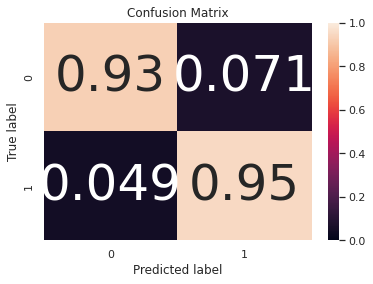

In [ ]:
# Confusion matrix
y_pred_bestparams = logisticRegr.predict(X_test)

conf_matrix = metrics.confusion_matrix(y_test, y_pred_bestparams)
conf_matrix_norm = conf_matrix / conf_matrix.sum(axis=1)[:, np.newaxis]

print("Confusion matrix in percentages:")
plt.figure()
plot_confusion_matrix(conf_matrix_norm, classes=logisticRegr.classes_)

tn, fp, fn, tp = conf_matrix.ravel()
accuracy = (tp + tn) / (tn+ fp+ fn+ tp )
precision = tp / (tp + fp)
recall = tp / (tp + fn)
print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("Recall: ", recall)

# Fbeta-score
f_score = metrics.fbeta_score(y_test, y_pred_bestparams, beta=2)
print("F-score (with focus on recall, beta=2): ", f_score)

# to get the log loss
from sklearn.metrics import log_loss
lr_log_loss = log_loss(y_test, logisticRegr_probability)
print(lr_log_loss)

## Tuning with PCA:

In [ ]:
solvers = ['newton-cg', 'lbfgs', 'liblinear','saga','sag']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]

grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='recall',error_score=0)

grid_result_pca = grid_search.fit(X_train_pca, y_train)

# summarize results
print("Best: %f using %s" % (grid_result_pca.best_score_, grid_result_pca.best_params_))
means_pca = grid_result_pca.cv_results_['mean_test_score']
stds_pca = grid_result_pca.cv_results_['std_test_score']
params_pca = grid_result_pca.cv_results_['params']
for mean_pca, stdev_pca, param_pca in zip(means_pca, stds_pca, params_pca):
    print("%f (params: %f) with: %r" % (mean_pca, stdev_pca, param_pca))

Best: 0.936266 using {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.936075 (params: 0.006628) with: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.936075 (params: 0.006545) with: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.936266 (params: 0.006593) with: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.931787 (params: 0.007286) with: {'C': 100, 'penalty': 'l2', 'solver': 'saga'}
0.931216 (params: 0.007178) with: {'C': 100, 'penalty': 'l2', 'solver': 'sag'}
0.935122 (params: 0.006897) with: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.935122 (params: 0.006897) with: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
0.935218 (params: 0.006875) with: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
0.931787 (params: 0.007286) with: {'C': 10, 'penalty': 'l2', 'solver': 'saga'}
0.931216 (params: 0.007178) with: {'C': 10, 'penalty': 'l2', 'solver': 'sag'}
0.932836 (params: 0.006923) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}
0.932836 (params: 0.006923) 

In [ ]:
logisticRegr_pca = LogisticRegression(max_iter = 10000, penalty='l2', C = 100, solver = 'liblinear')
logisticRegr_pca.fit(X_train_pca, y_train)
y_pred_pca = logisticRegr_pca.predict(X_test_pca)

logisticRegr_probability_pca = logisticRegr_pca.predict_proba(X_test_pca)
# generate a no skill prediction (majority class)
lr_ns_probability = [0 for _ in range(len(y_test))]
# predict probabilities
logisticRegr_probability_pca = logisticRegr_pca.predict_proba(X_test_pca)
# keep probabilities for the positive outcome only
logisticRegr_probability_pca = logisticRegr_probability_pca[:, 1]
# calculate scores
lr_ns_auc = roc_auc_score(y_test, lr_ns_probability)
logisticRegr_auc_pca = roc_auc_score(y_test, logisticRegr_probability_pca)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (lr_ns_auc))
print('Logistic: ROC AUC=%.3f' % (logisticRegr_auc_pca))
# calculate roc curves
lr_ns_fpr_pca, lr_ns_tpr_pca, _ = roc_curve(y_test, lr_ns_probability)
logisticRegr_fpr_pca, logisticRegr_tpr_pca, _ = roc_curve(y_test, logisticRegr_probability_pca)

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.975


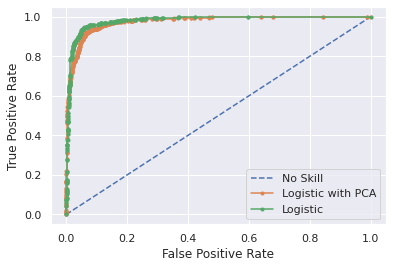

In [ ]:
from matplotlib import pyplot
# calculate roc curves
lr_ns_fpr_pca, lr_ns_tpr_pca, _ = roc_curve(y_test, lr_ns_probability)
lr_fpr_pca, lr_tpr_pca, _ = roc_curve(y_test, logisticRegr_probability_pca)
# plot the roc curve for the model
pyplot.plot(lr_ns_fpr_pca, lr_ns_tpr_pca, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr_pca, lr_tpr_pca, marker='.', label='Logistic with PCA')

lr_ns_fpr, lr_ns_tpr, _ = roc_curve(y_test, lr_ns_probability)
lr_fpr, lr_tpr, _ = roc_curve(y_test, logisticRegr_probability)
# plot the roc curve for the model
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')

# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [ ]:
# to get the log loss
from sklearn.metrics import log_loss
lr_log_loss_pca = log_loss(y_test, logisticRegr_probability_pca)
print(lr_log_loss_pca)

0.2140643887628468


Confusion matrix in percentages:
Accuracy:  0.9396062729396063
Precision:  0.9300196206671026
Recall:  0.9505347593582888
F-score (with focus on recall, beta=2):  0.9301397205588823


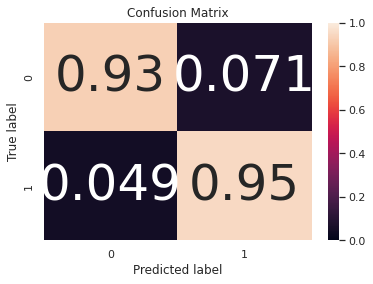

In [ ]:
# Confusion matrix
y_pred_bestparams_pca = logisticRegr_pca.predict(X_test_pca)

conf_matrix_pca = metrics.confusion_matrix(y_test, y_pred_bestparams)
conf_matrix_norm_pca = conf_matrix_pca / conf_matrix_pca.sum(axis=1)[:, np.newaxis]

print("Confusion matrix in percentages:")
plt.figure()
plot_confusion_matrix(conf_matrix_norm_pca, classes=logisticRegr_pca.classes_)

# True Positives, etc.
tn_pca, fp_pca, fn_pca, tp_pca = conf_matrix_pca.ravel()

# Calculate precision and recall
accuracy_pca = (tp_pca + tn_pca) / (tn_pca+ fp_pca+ fn_pca+ tp_pca )
precision_pca = tp_pca / (tp_pca + fp_pca)
recall_pca = tp_pca / (tp_pca + fn_pca)
print("Accuracy: ", accuracy_pca)
print("Precision: ", precision_pca)
print("Recall: ", recall_pca)

# Fbeta-score
f_score_pca = metrics.fbeta_score(y_test, y_pred_bestparams_pca, beta=2)
print("F-score (with focus on recall, beta=2): ", f_score_pca)

# Best Model

---

**Decision Tree: Tuned Model AdaBoost without/with PCA**

In [ ]:
testing_data_without_labels = testing_data.drop(["id","CLASS_LABEL"],axis=1)

In [ ]:
prediction_results = dt_clf2.predict(testing_data_without_labels)

In [ ]:
testing_data['prediction_results'] = prediction_results
testing_data[["id","CLASS_LABEL","prediction_results"]]

,id,CLASS_LABEL,prediction_results
0,1,1,1
1,2,1,1
2,3,1,1
3,4,1,1
4,5,1,1
9995,9996,0,0
9996,9997,0,0
9997,9998,0,0
9998,9999,0,0
9999,10000,0,0


**AdaBoost Decision Tree Top 5 Importance Feature**

In [ ]:
dt_clf2.best_estimator_

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(criterion='entropy',
                                                         max_depth=4,
                                                         min_samples_leaf=5),
                   learning_rate=0.1, n_estimators=100)

In [ ]:
best_model_dtree = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(criterion='entropy',
                                                         max_depth=8,
                                                         min_samples_leaf=5),
                   learning_rate=1, n_estimators=100)

In [ ]:
best_model_dtree.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(criterion='entropy',
                                                         max_depth=8,
                                                         min_samples_leaf=5),
                   learning_rate=1, n_estimators=100)

In [ ]:
feature_importance_df = pd.DataFrame({'Feature Names':X_train.columns, 'Feature Importance': best_model_dtree.feature_importances_})
feature_importance_df.sort_values(by='Feature Importance',ascending=False)

/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:631: RuntimeWarning: invalid value encountered in true_divide
  return self.tree_.compute_feature_importances()


,Feature Names,Feature Importance
0,NumDots,5.074333e-02
4,NumDash,4.567102e-02
29,InsecureForms,3.885649e-02
46,ExtMetaScriptLinkRT,3.053289e-02
22,QueryLength,2.894567e-02
10,NumQueryComponents,2.368558e-02
28,ExtFavicon,2.216313e-02
15,RandomString,1.837403e-02
18,DomainInPaths,1.318616e-02
38,SubmitInfoToEmail,9.447733e-03


In [ ]:
from sklearn.inspection import permutation_importance
result = permutation_importance(
    best_model_dtree, X_test, y_test, n_repeats=10, n_jobs=2
)

In [ ]:
feature_importance_df = pd.DataFrame({'Feature Names':X_test.columns, 'Feature Importance': result.importances_mean})
feature_importance_df.sort_values(by='Feature Importance',ascending=False)

,Feature Names,Feature Importance
26,PctExtHyperlinks,0.063964
33,PctNullSelfRedirectHyperlinks,0.019486
47,PctExtNullSelfRedirectHyperlinksRT,0.013213
29,InsecureForms,0.012379
27,PctExtResourceUrls,0.011211
4,NumDash,0.004771
13,NumNumericChars,0.004705
2,PathLevel,0.004004
0,NumDots,0.003537
34,FrequentDomainNameMismatch,0.003403
